In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
import tensorflow as tf
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from lime import lime_image
from skimage.segmentation import mark_boundaries
warnings.filterwarnings("ignore")

In [25]:
import glob
train_0 = glob.glob('/train_224/0/*.*')
train_1 = glob.glob('/train_224/1/*.*')
train_2 = glob.glob('/train_224/2/*.*')
train_3 = glob.glob('/train_224/3/*.*')
train_4 = glob.glob('/train_224/4/*.*')
train_5 = glob.glob('/train_224/5/*.*')
train_6 = glob.glob('/train_224/6/*.*')
train_7 = glob.glob('/train_224/7/*.*')
train_8 = glob.glob('/train_224/8/*.*')
train_9 = glob.glob('/train_224/9/*.*')

In [26]:
import glob
test_0 = glob.glob('/test_224/0/*.*')
test_1 = glob.glob('test_224/1/*.*')
test_2 = glob.glob('/test_224/2/*.*')
test_3 = glob.glob('/test_224/3/*.*')
test_4 = glob.glob('/test_224/4/*.*')
test_5 = glob.glob('/test_224/5/*.*')
test_6 = glob.glob('/test_224/6/*.*')
test_7 = glob.glob('/test_224/7/*.*')
test_8 = glob.glob('/test_224/8/*.*')
test_9 = glob.glob('/test_224/9/*.*')

In [27]:
train_data = []
train_labels = []

for i in train_0:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(0)
for i in train_1:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(1)
for i in train_2:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(2)
for i in train_3:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(3)
for i in train_4:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(4)
for i in train_5:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(5)
for i in train_6:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(6)
for i in train_7:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(7)
for i in train_8:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(8)
for i in train_9:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(9)

In [28]:
X_train = np.array(train_data)
y_train = np.array(train_labels)

In [29]:
y_train

array([0, 0, 0, ..., 9, 9, 9])

In [30]:
test_data = []
test_labels = []

for i in test_0:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(0)
for i in test_1:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(1)
for i in test_2:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(2)
for i in test_3:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(3)
for i in test_4:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(4)
for i in test_5:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(5)
for i in test_6:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(6)
for i in test_7:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(7)
for i in test_8:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(8)
for i in test_9:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (128,128))
    image=np.array(image)
    test_data.append(image)
    test_labels.append(9)

In [31]:
X_test = np.array(test_data)
y_test = np.array(test_labels)

In [32]:
y_test

array([0, 0, 0, ..., 9, 9, 9])

In [33]:
num_classes = 10
input_shape = (128, 128, 3)

x_train = X_train
x_test = X_test
y_train = y_train
y_test = y_test

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (110337, 128, 128, 3) - y_train shape: (110337,)
x_test shape: (27584, 128, 128, 3) - y_test shape: (27584,)


In [34]:
# Define the custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        sample = self.X[idx]
        target = self.y[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, target

# Define your transform function
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add other transforms here if needed
])
# Create datasets
train_dataset = CustomDataset(x_train, y_train, transform=transform)
test_dataset = CustomDataset(x_test, y_test, transform=transform)

In [35]:
# Collect all labels from the dataset
labels = []
for _, label in train_dataset:
    labels.append(label)

# Convert to a set to get unique labels
unique_labels = set(labels)

print("Unique labels in train_dataset:", unique_labels)

Unique labels in train_dataset: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [36]:
# Compute sizes for the split
total_size = len(train_dataset)
train_size = int(total_size * 0.83)
dev_size = total_size - train_size  # Ensure that the sizes sum up to the total size

# Print sizes to verify
print(f"Total dataset size: {total_size}")
print(f"Training dataset size: {train_size}")
print(f"Development dataset size: {dev_size}")

Total dataset size: 110337
Training dataset size: 91579
Development dataset size: 18758


In [37]:
# Split the dataset
# Define your transform function
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add other transforms here if needed
])
# Create datasets
train_dataset = CustomDataset(x_train, y_train, transform=transform)
test_dataset = CustomDataset(x_test, y_test, transform=transform)
train_dataset, dev_dataset = random_split(train_dataset, [train_size, dev_size])

In [38]:
total_train_size = len(train_dataset)
total_test_size = len(test_dataset)
total_dev_size = len(dev_dataset)

classes = 10
input_dim = (128, 128, 3)
batch_size = 128
epochs_per_client = 3
learning_rate = 2e-2

In [39]:
print(f"Training dataset size: {total_train_size}")
print(f"Testing dataset size: {total_test_size}")
print(f"Development dataset size: {total_dev_size}")

Training dataset size: 91579
Testing dataset size: 27584
Development dataset size: 18758


In [42]:
# Define DNN model
class FederatedNetDNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Assuming input shape is (128, 128, 3), we need to flatten this
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128*128*3, 1024)  # First hidden layer
        self.fc2 = nn.Linear(1024, 512)         # Second hidden layer
        self.fc3 = nn.Linear(512, 10)           # Output layer (num_classes)
        self.non_linearity = F.relu
        self.track_layers = {'fc1': self.fc1, 'fc2': self.fc2, 'fc3': self.fc3}
    
    def forward(self, x_batch):
        out = self.flatten(x_batch)
        out = self.fc1(out)
        out = self.non_linearity(out)
        out = self.fc2(out)
        out = self.non_linearity(out)
        out = self.fc3(out)
        return out
    
    def get_track_layers(self):
        return self.track_layers
    
    def apply_parameters(self, parameters_dict):
        with torch.no_grad():
            for layer_name in parameters_dict:
                self.track_layers[layer_name].weight.data *= 0
                self.track_layers[layer_name].bias.data *= 0
                self.track_layers[layer_name].weight.data += parameters_dict[layer_name]['weight']
                self.track_layers[layer_name].bias.data += parameters_dict[layer_name]['bias']
    
    def get_parameters(self):
        parameters_dict = dict()
        for layer_name in self.track_layers:
            parameters_dict[layer_name] = {
                'weight': self.track_layers[layer_name].weight.data, 
                'bias': self.track_layers[layer_name].bias.data
            }
        return parameters_dict
    
    def batch_accuracy(self, outputs, labels):
        with torch.no_grad():
            _, predictions = torch.max(outputs, dim=1)
            return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))
    
    def _process_batch(self, batch):
        images, labels = batch
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)
        accuracy = self.batch_accuracy(outputs, labels)
        return (loss, accuracy)
    
    def fit(self, dataset, epochs, lr, batch_size=128, opt=torch.optim.SGD):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size, shuffle=True), device)
        optimizer = opt(self.parameters(), lr)
        history = []
        for epoch in range(epochs):
            losses = []
            accs = []
            for batch in dataloader:
                loss, acc = self._process_batch(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                losses.append(loss)
                accs.append(acc)
            avg_loss = torch.stack(losses).mean().item()
            avg_acc = torch.stack(accs).mean().item()
            history.append((avg_loss, avg_acc))
        return history
    
    def evaluate(self, dataset, batch_size=128):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size), device)
        losses = []
        accs = []
        all_labels = []
        all_preds = []
        with torch.no_grad():
            for batch in dataloader:
                images, labels = batch
                outputs = self(images)
                loss = F.cross_entropy(outputs, labels)
                accuracy = self.batch_accuracy(outputs, labels)
                
                # Collect true labels and predictions
                _, predictions = torch.max(outputs, dim=1)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predictions.cpu().numpy())
                
                losses.append(loss)
                accs.append(accuracy)
        avg_loss = torch.stack(losses).mean().item()
        avg_acc = torch.stack(accs).mean().item()
        return avg_loss, avg_acc, np.array(all_labels), np.array(all_preds)

In [44]:
# Client Class
class Client:
    def __init__(self, client_id, dataset):
        self.client_id = client_id
        self.dataset = dataset
    
    def get_dataset_size(self):
        return len(self.dataset)
    
    def get_client_id(self):
        return self.client_id
    
    def train(self, parameters_dict):
        net = to_device(FederatedNetDNN(), device)
        net.apply_parameters(parameters_dict)
        train_history = net.fit(self.dataset, epochs_per_client, learning_rate, batch_size)
        print('{}: Loss = {}, Accuracy = {}'.format(self.client_id, round(train_history[-1][0], 4), round(train_history[-1][1], 4)))
        return net.get_parameters()

def print_classification_report_and_confusion_matrix(labels, preds, num_classes):
    # Classification Report
    print("Classification Report:\n", classification_report(labels, preds, digits=4))
    
    # Confusion Matrix
    cm = confusion_matrix(labels, preds, labels=range(num_classes))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [45]:
num_classes = 10
input_dim = 128  # Assuming input dimension for the LSTM
hidden_dim = 64
batch_size = 128
epochs_per_client = 3
learning_rate = 2e-2
num_clients = 5
rounds = 25

In [46]:
examples_per_client = total_train_size // num_clients
client_datasets = random_split(train_dataset, [min(i + examples_per_client, 
           total_train_size) - i for i in range(0, total_train_size, examples_per_client)])
clients = [Client('client_' + str(i), client_datasets[i]) for i in range(num_clients)]

In [48]:
# Utility Functions
def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader(DataLoader):
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)

    def __len__(self):
        return len(self.dl)
device = get_device()

Start Round 1 ...
client_0: Loss = 0.7453, Accuracy = 0.7127
client_1: Loss = 0.7501, Accuracy = 0.7077
client_2: Loss = 0.7447, Accuracy = 0.7181
client_3: Loss = 0.738, Accuracy = 0.7184
client_4: Loss = 0.752, Accuracy = 0.7091
After round 1, train_loss = 0.6797, train_acc = 0.7275, dev_loss = 0.6873, dev_acc = 0.7233, test_loss = 0.6843, test_acc = 0.7303
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9592    0.9657    0.9624     17961
           1     0.6144    0.9164    0.7356     31246
           2     0.7862    0.7992    0.7926     21586
           3     0.4356    0.0920    0.1519     10324
           4     0.5916    0.0295    0.0562      6672
           5     0.0000    0.0000    0.0000      1428
           6     0.8629    0.9965    0.9249      1143
           7     0.9901    0.9770    0.9835      1128
           8     0.0000    0.0000    0.0000        84
           9     0.0000    0.0000    0.0000         7

   

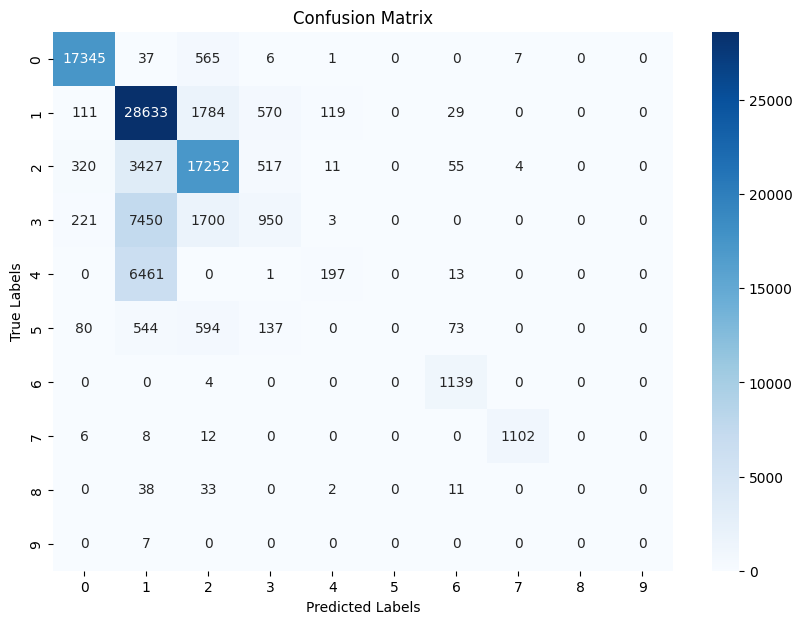

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9643    0.9591    0.9617      3693
           1     0.6050    0.9172    0.7291      6255
           2     0.7835    0.8045    0.7938      4449
           3     0.4336    0.0899    0.1490      2179
           4     0.6081    0.0329    0.0624      1369
           5     0.0000    0.0000    0.0000       315
           6     0.8815    1.0000    0.9370       253
           7     0.9775    0.9688    0.9731       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7234     18758
   macro avg     0.5254    0.4772    0.4606     18758
weighted avg     0.6958    0.7234    0.6669     18758



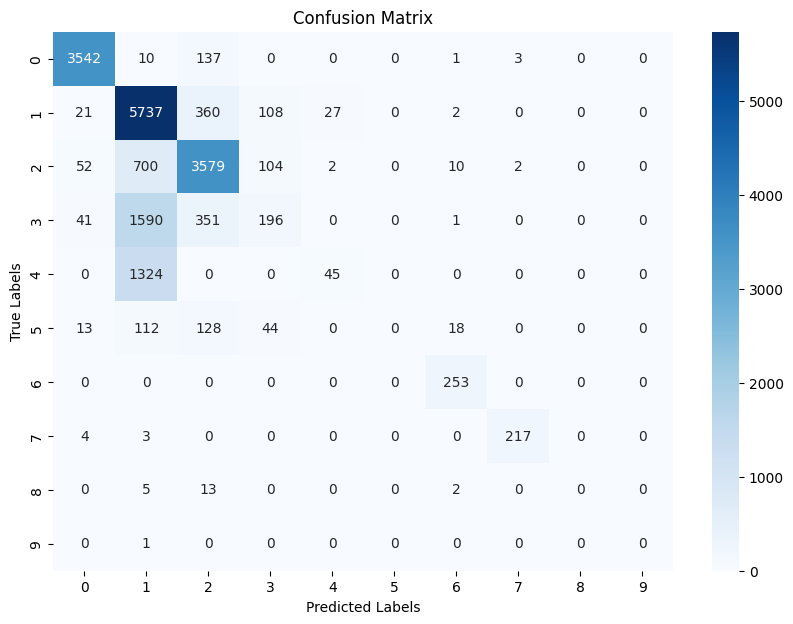

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9605    0.9652    0.9629      5373
           1     0.6157    0.9187    0.7373      9352
           2     0.7940    0.8044    0.7992      6599
           3     0.4365    0.0934    0.1539      3126
           4     0.5368    0.0261    0.0498      1953
           5     0.0000    0.0000    0.0000       403
           6     0.8849    0.9840    0.9318       375
           7     0.9890    0.9704    0.9796       372
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7308     27584
   macro avg     0.5218    0.4762    0.4615     27584
weighted avg     0.6987    0.7308    0.6756     27584



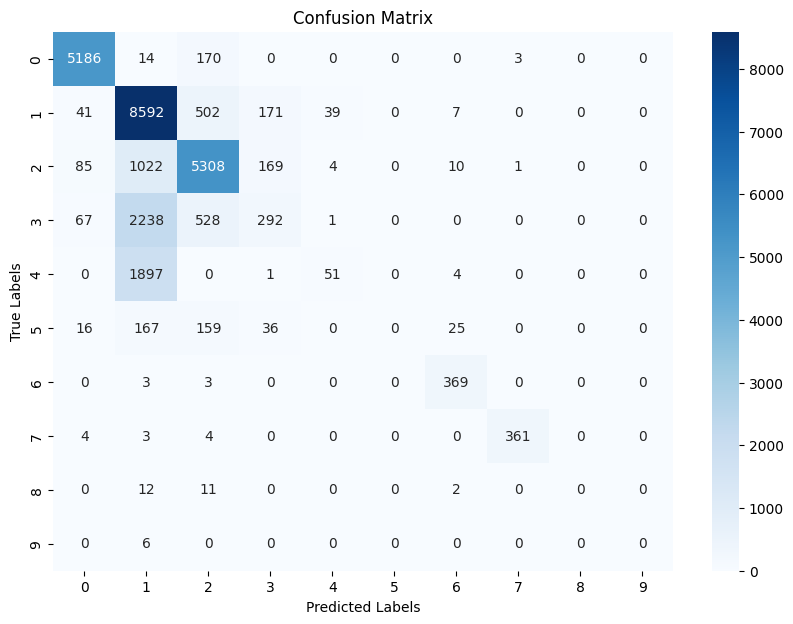

Start Round 2 ...
client_0: Loss = 0.6561, Accuracy = 0.7348
client_1: Loss = 0.6663, Accuracy = 0.7257
client_2: Loss = 0.6634, Accuracy = 0.7365
client_3: Loss = 0.6534, Accuracy = 0.7368
client_4: Loss = 0.6558, Accuracy = 0.7353
After round 2, train_loss = 0.6733, train_acc = 0.7211, dev_loss = 0.6802, dev_acc = 0.7181, test_loss = 0.6778, test_acc = 0.7229
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9966    0.9691    0.9826     17961
           1     0.6959    0.6866    0.6912     31246
           2     0.8220    0.7937    0.8076     21586
           3     0.4076    0.1807    0.2504     10324
           4     0.3862    0.8889    0.5385      6672
           5     0.0000    0.0000    0.0000      1428
           6     0.8216    0.9991    0.9017      1143
           7     0.9937    0.9823    0.9880      1128
           8     0.0000    0.0000    0.0000        84
           9     0.0000    0.0000    0.0000         7

 

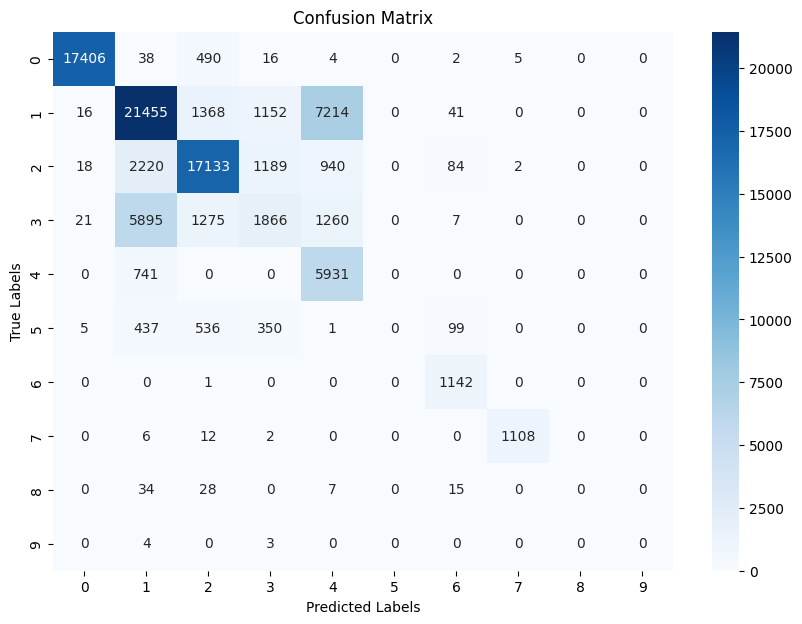

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9944    0.9645    0.9792      3693
           1     0.6824    0.6898    0.6861      6255
           2     0.8242    0.8009    0.8124      4449
           3     0.4026    0.1698    0.2389      2179
           4     0.3854    0.8671    0.5336      1369
           5     0.0000    0.0000    0.0000       315
           6     0.8295    1.0000    0.9068       253
           7     0.9735    0.9821    0.9778       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7181     18758
   macro avg     0.5092    0.5474    0.5135     18758
weighted avg     0.7165    0.7181    0.7049     18758



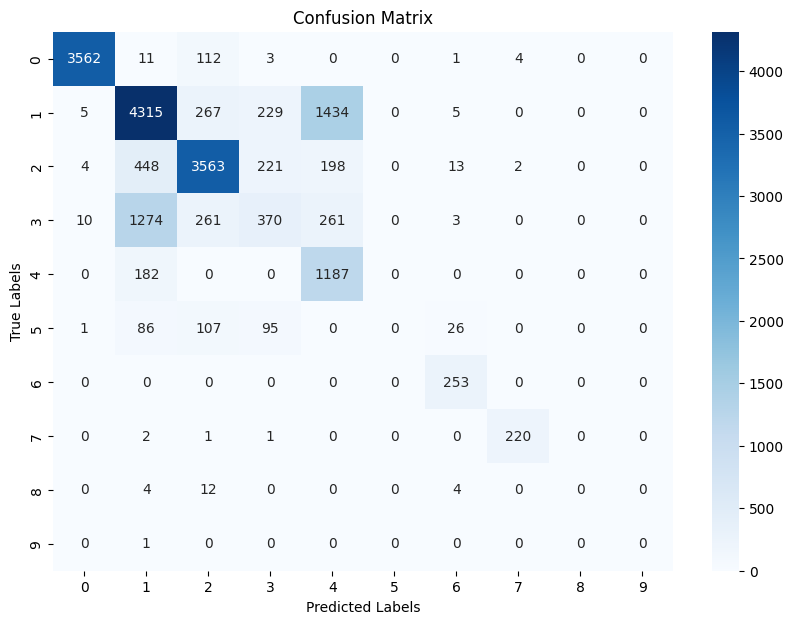

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9949    0.9708    0.9827      5373
           1     0.6953    0.6904    0.6929      9352
           2     0.8301    0.7972    0.8133      6599
           3     0.4007    0.1763    0.2448      3126
           4     0.3819    0.8879    0.5341      1953
           5     0.0000    0.0000    0.0000       403
           6     0.8552    0.9920    0.9185       375
           7     0.9918    0.9785    0.9851       372
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7234     27584
   macro avg     0.5150    0.5493    0.5171     27584
weighted avg     0.7256    0.7234    0.7122     27584



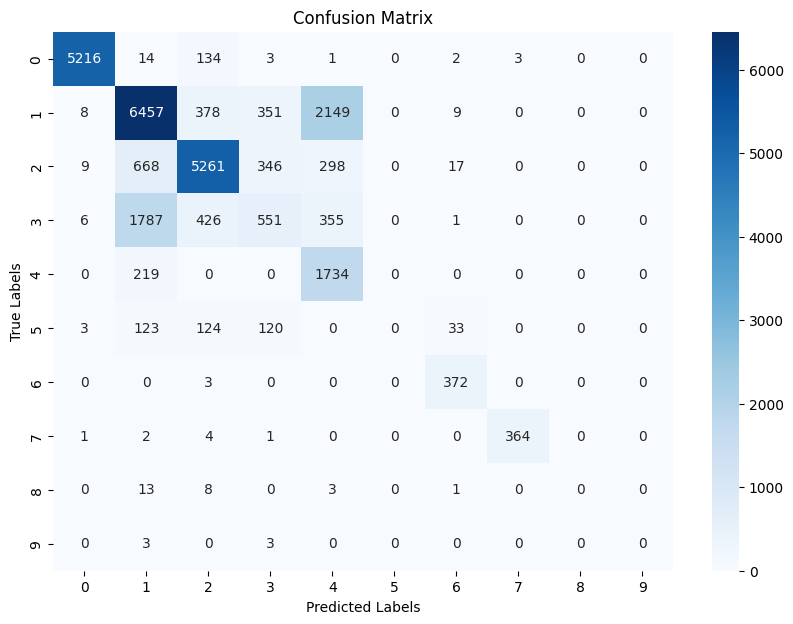

Start Round 3 ...
client_0: Loss = 0.6093, Accuracy = 0.7457
client_1: Loss = 0.6256, Accuracy = 0.735
client_2: Loss = 0.6018, Accuracy = 0.7475
client_3: Loss = 0.6047, Accuracy = 0.7483
client_4: Loss = 0.6164, Accuracy = 0.7421
After round 3, train_loss = 0.7183, train_acc = 0.7338, dev_loss = 0.7341, dev_acc = 0.7288, test_loss = 0.7197, test_acc = 0.7369
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9990    0.9744    0.9866     17961
           1     0.6078    0.9399    0.7382     31246
           2     0.7762    0.8323    0.8032     21586
           3     0.0000    0.0000    0.0000     10324
           4     0.6648    0.0181    0.0353      6672
           5     0.0000    0.0000    0.0000      1428
           6     0.8828    0.9816    0.9296      1143
           7     0.9789    0.9894    0.9841      1128
           8     0.0000    0.0000    0.0000        84
           9     0.0000    0.0000    0.0000         7

  

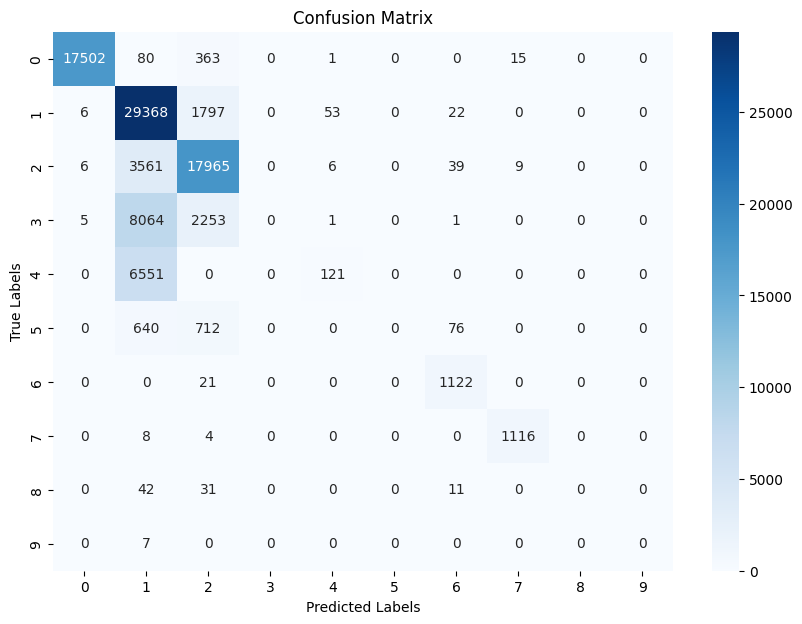

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9710    0.9846      3693
           1     0.5983    0.9396    0.7311      6255
           2     0.7757    0.8355    0.8045      4449
           3     0.0000    0.0000    0.0000      2179
           4     0.6531    0.0234    0.0451      1369
           5     0.0000    0.0000    0.0000       315
           6     0.8856    0.9486    0.9160       253
           7     0.9526    0.9866    0.9693       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7289     18758
   macro avg     0.4864    0.4705    0.4451     18758
weighted avg     0.6511    0.7289    0.6557     18758



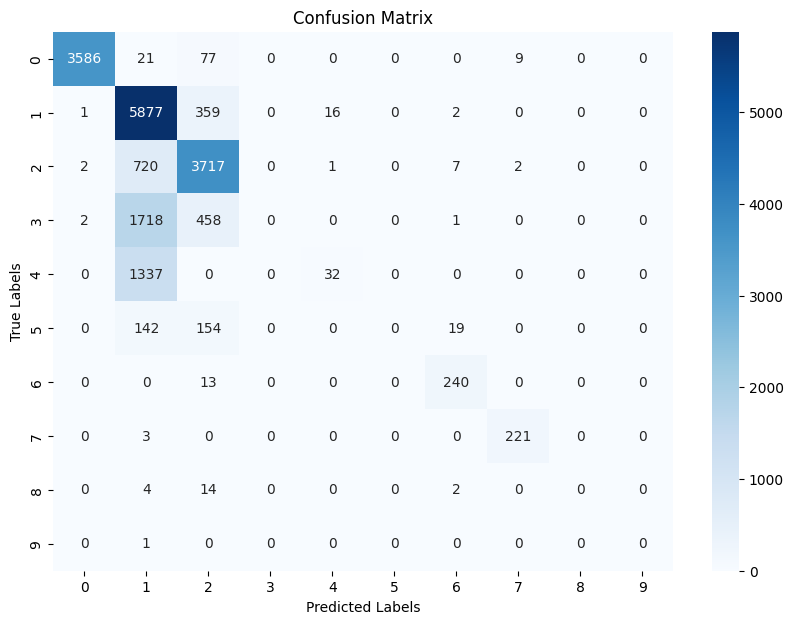

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9765    0.9876      5373
           1     0.6080    0.9427    0.7393      9352
           2     0.7876    0.8379    0.8120      6599
           3     0.0000    0.0000    0.0000      3126
           4     0.5122    0.0108    0.0211      1953
           5     0.0000    0.0000    0.0000       403
           6     0.9093    0.9627    0.9352       375
           7     0.9813    0.9866    0.9839       372
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7374     27584
   macro avg     0.4797    0.4717    0.4479     27584
weighted avg     0.6510    0.7374    0.6647     27584



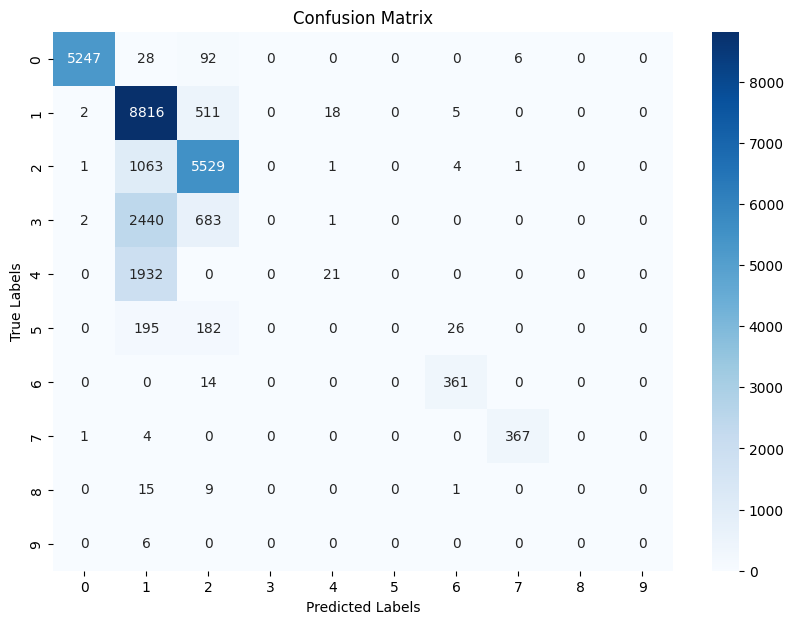

Start Round 4 ...
client_0: Loss = 0.5833, Accuracy = 0.7512
client_1: Loss = 0.5915, Accuracy = 0.7458
client_2: Loss = 0.5781, Accuracy = 0.7519
client_3: Loss = 0.5708, Accuracy = 0.753
client_4: Loss = 0.576, Accuracy = 0.7515
After round 4, train_loss = 0.5807, train_acc = 0.7528, dev_loss = 0.5837, dev_acc = 0.7537, test_loss = 0.5838, test_acc = 0.7526
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9636    0.9968    0.9799     17961
           1     0.7026    0.7800    0.7393     31246
           2     0.8698    0.7768    0.8207     21586
           3     0.4411    0.6519    0.5261     10324
           4     0.7082    0.1295    0.2190      6672
           5     0.6901    0.0343    0.0654      1428
           6     0.8382    0.9974    0.9109      1143
           7     0.9929    0.9876    0.9902      1128
           8     0.0000    0.0000    0.0000        84
           9     0.0000    0.0000    0.0000         7

   

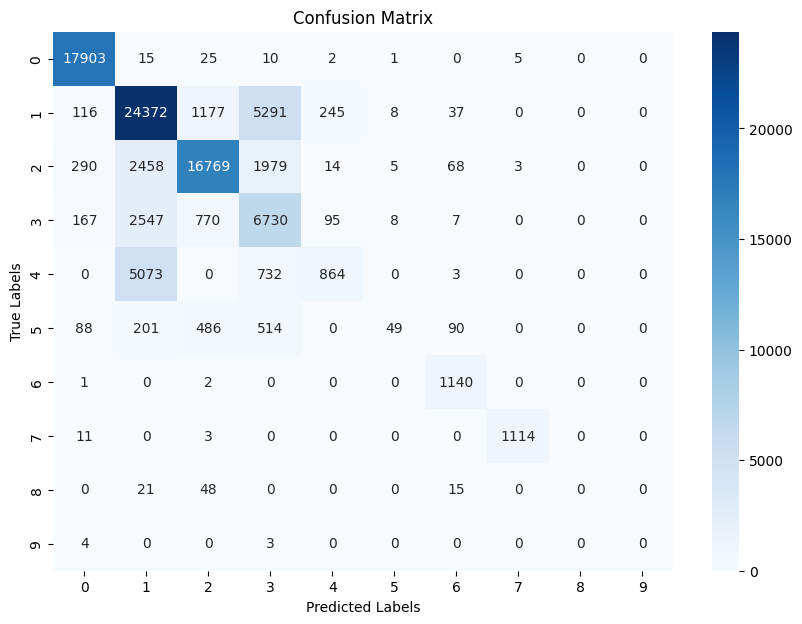

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9661    0.9968    0.9812      3693
           1     0.6937    0.7866    0.7372      6255
           2     0.8748    0.7853    0.8277      4449
           3     0.4508    0.6397    0.5289      2179
           4     0.7105    0.1183    0.2029      1369
           5     0.7143    0.0476    0.0893       315
           6     0.8475    0.9881    0.9124       253
           7     0.9779    0.9866    0.9822       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7537     18758
   macro avg     0.6236    0.5349    0.5262     18758
weighted avg     0.7684    0.7537    0.7371     18758



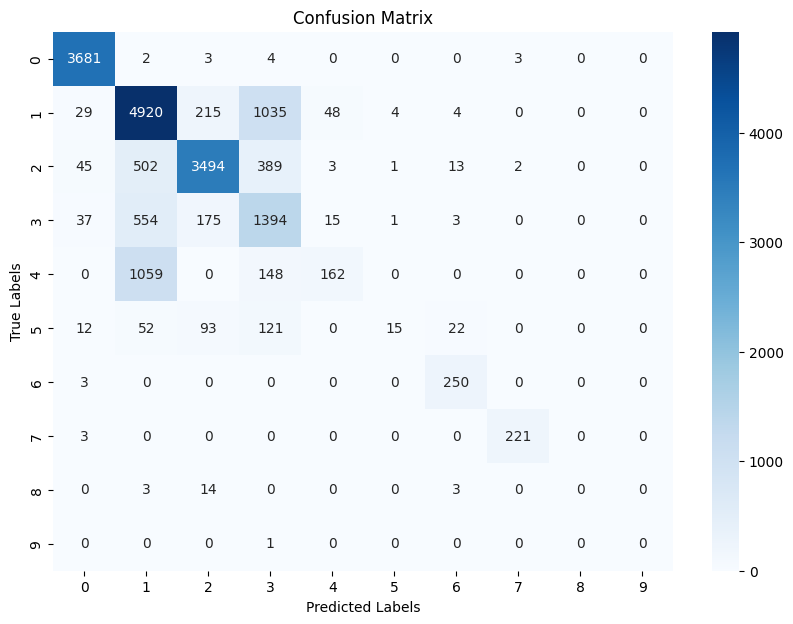

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9618    0.9978    0.9794      5373
           1     0.7016    0.7784    0.7380      9352
           2     0.8756    0.7733    0.8213      6599
           3     0.4409    0.6536    0.5265      3126
           4     0.6770    0.1234    0.2087      1953
           5     0.6500    0.0323    0.0615       403
           6     0.8618    0.9813    0.9177       375
           7     0.9919    0.9839    0.9879       372
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7532     27584
   macro avg     0.6161    0.5324    0.5241     27584
weighted avg     0.7672    0.7532    0.7386     27584



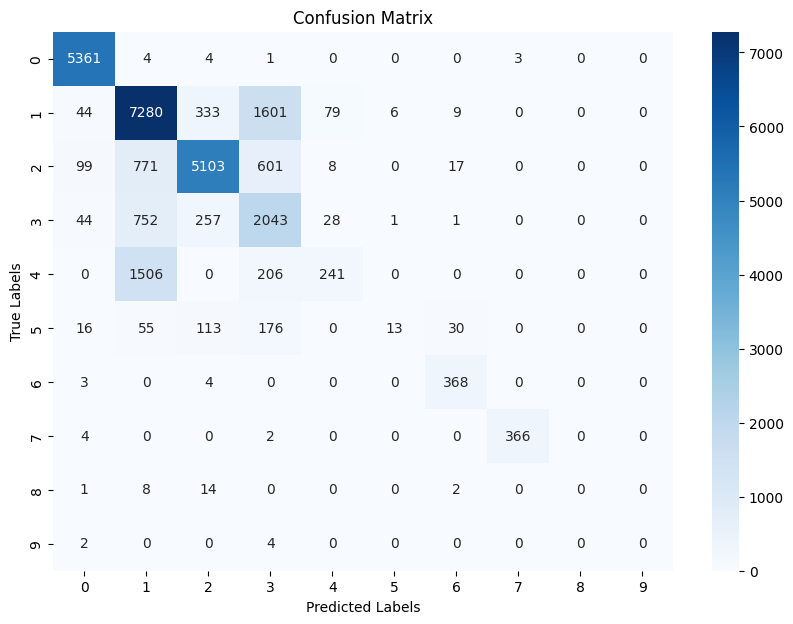

Start Round 5 ...
client_0: Loss = 0.5681, Accuracy = 0.7557
client_1: Loss = 0.5612, Accuracy = 0.75
client_2: Loss = 0.5568, Accuracy = 0.7574
client_3: Loss = 0.5692, Accuracy = 0.7572
client_4: Loss = 0.5494, Accuracy = 0.7584
After round 5, train_loss = 0.5895, train_acc = 0.7435, dev_loss = 0.5898, dev_acc = 0.7444, test_loss = 0.5922, test_acc = 0.7406
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9982    0.9923    0.9953     17961
           1     0.7910    0.6377    0.7062     31246
           2     0.8896    0.7703    0.8257     21586
           3     0.3860    0.8432    0.5296     10324
           4     0.5690    0.4065    0.4742      6672
           5     0.7500    0.0294    0.0566      1428
           6     0.8464    0.9983    0.9161      1143
           7     0.9946    0.9867    0.9907      1128
           8     0.0000    0.0000    0.0000        84
           9     0.0000    0.0000    0.0000         7

   

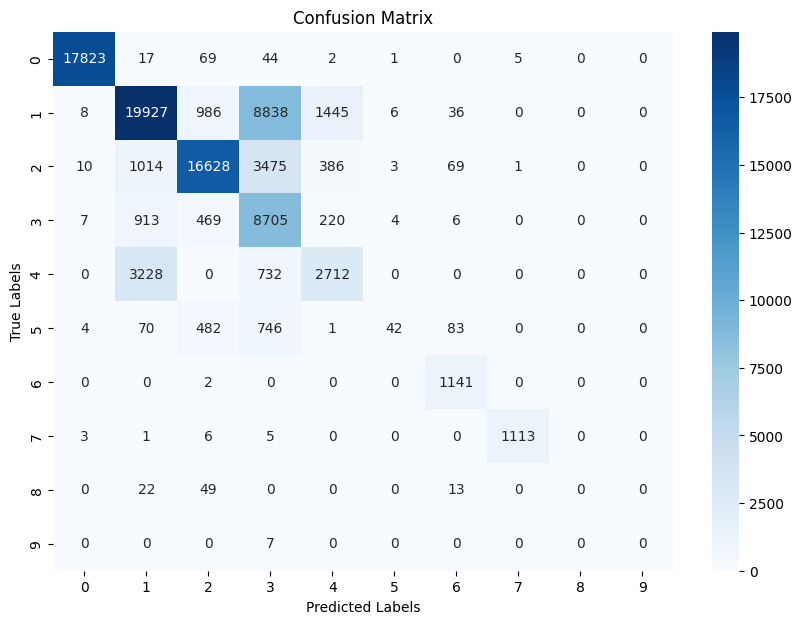

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9916    0.9951      3693
           1     0.7762    0.6403    0.7017      6255
           2     0.8910    0.7770    0.8301      4449
           3     0.3992    0.8398    0.5412      2179
           4     0.5558    0.3784    0.4502      1369
           5     0.8750    0.0444    0.0846       315
           6     0.8576    1.0000    0.9234       253
           7     0.9866    0.9866    0.9866       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7442     18758
   macro avg     0.6340    0.5658    0.5513     18758
weighted avg     0.7917    0.7442    0.7482     18758



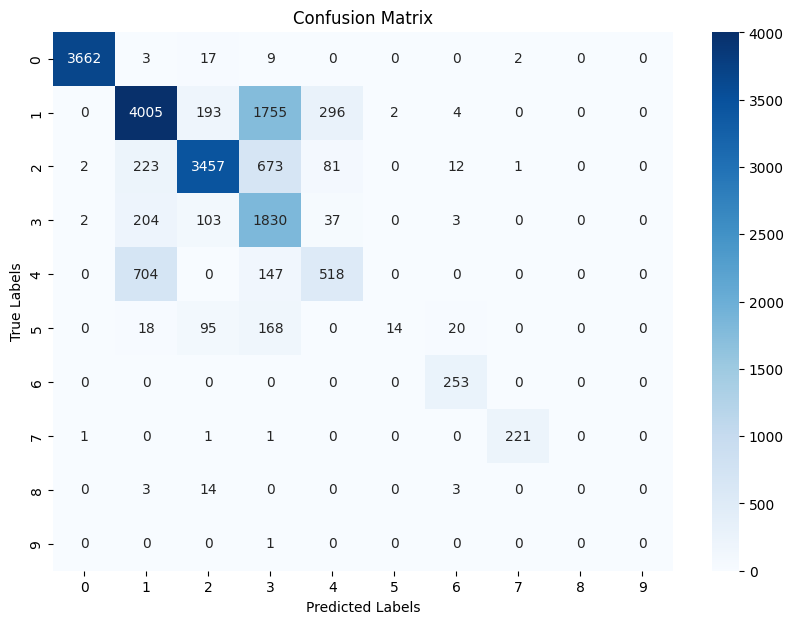

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9916    0.9947      5373
           1     0.7836    0.6322    0.6998      9352
           2     0.8911    0.7698    0.8260      6599
           3     0.3852    0.8349    0.5272      3126
           4     0.5403    0.3917    0.4541      1953
           5     0.7647    0.0323    0.0619       403
           6     0.8771    0.9893    0.9298       375
           7     0.9973    0.9812    0.9892       372
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7412     27584
   macro avg     0.6237    0.5623    0.5483     27584
weighted avg     0.7916    0.7412    0.7474     27584



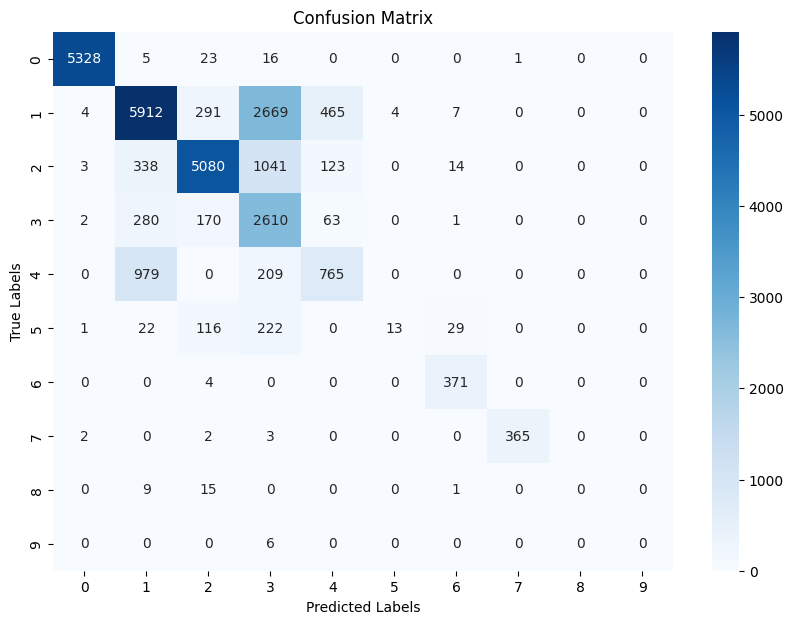

Start Round 6 ...
client_0: Loss = 0.5533, Accuracy = 0.7616
client_1: Loss = 0.55, Accuracy = 0.7526
client_2: Loss = 0.542, Accuracy = 0.7579
client_3: Loss = 0.554, Accuracy = 0.7551
client_4: Loss = 0.5336, Accuracy = 0.7598
After round 6, train_loss = 0.5924, train_acc = 0.7349, dev_loss = 0.5955, dev_acc = 0.7336, test_loss = 0.5908, test_acc = 0.7398
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9916    0.9954     17961
           1     0.8210    0.5795    0.6795     31246
           2     0.6819    0.9327    0.7879     21586
           3     0.5465    0.3161    0.4005     10324
           4     0.4166    0.8569    0.5606      6672
           5     0.9286    0.0091    0.0180      1428
           6     0.8520    0.9974    0.9190      1143
           7     0.9894    0.9885    0.9889      1128
           8     0.0000    0.0000    0.0000        84
           9     0.0000    0.0000    0.0000         7

    a

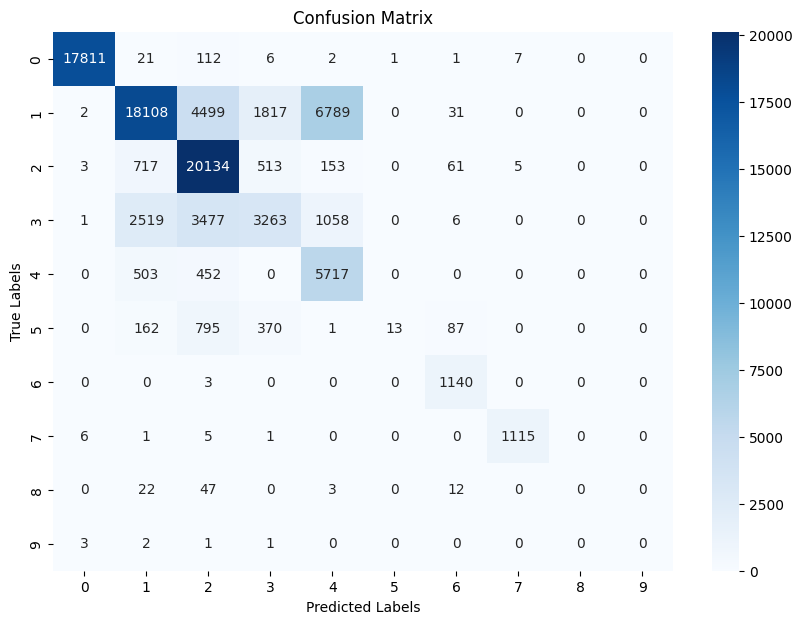

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9894    0.9940      3693
           1     0.8047    0.5799    0.6740      6255
           2     0.6861    0.9350    0.7915      4449
           3     0.5452    0.3102    0.3954      2179
           4     0.4217    0.8503    0.5638      1369
           5     1.0000    0.0190    0.0374       315
           6     0.8519    1.0000    0.9200       253
           7     0.9779    0.9866    0.9822       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7336     18758
   macro avg     0.6286    0.5670    0.5358     18758
weighted avg     0.7618    0.7336    0.7200     18758



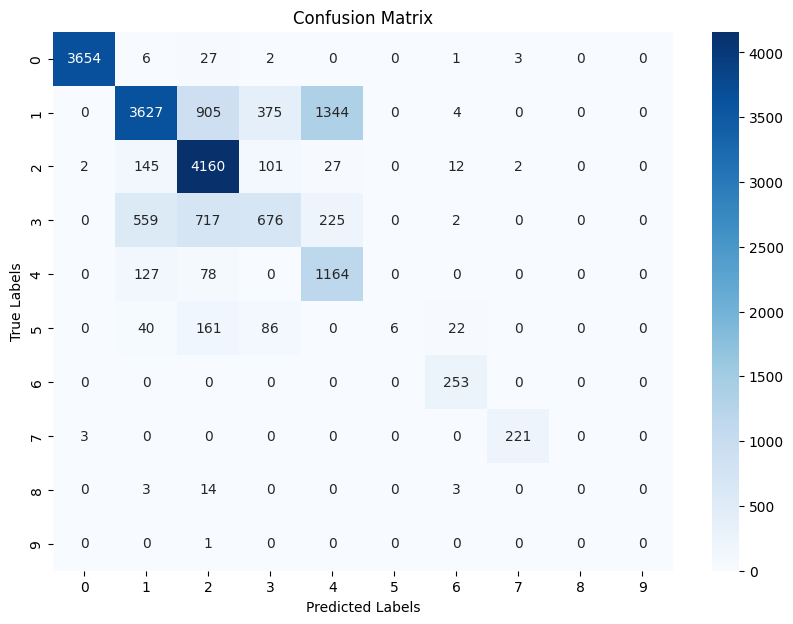

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9920    0.9955      5373
           1     0.8144    0.5876    0.6827      9352
           2     0.6950    0.9365    0.7979      6599
           3     0.5523    0.3225    0.4072      3126
           4     0.4192    0.8571    0.5631      1953
           5     0.6667    0.0050    0.0099       403
           6     0.8807    0.9840    0.9295       375
           7     0.9892    0.9839    0.9865       372
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7404     27584
   macro avg     0.6017    0.5669    0.5372     27584
weighted avg     0.7643    0.7404    0.7283     27584



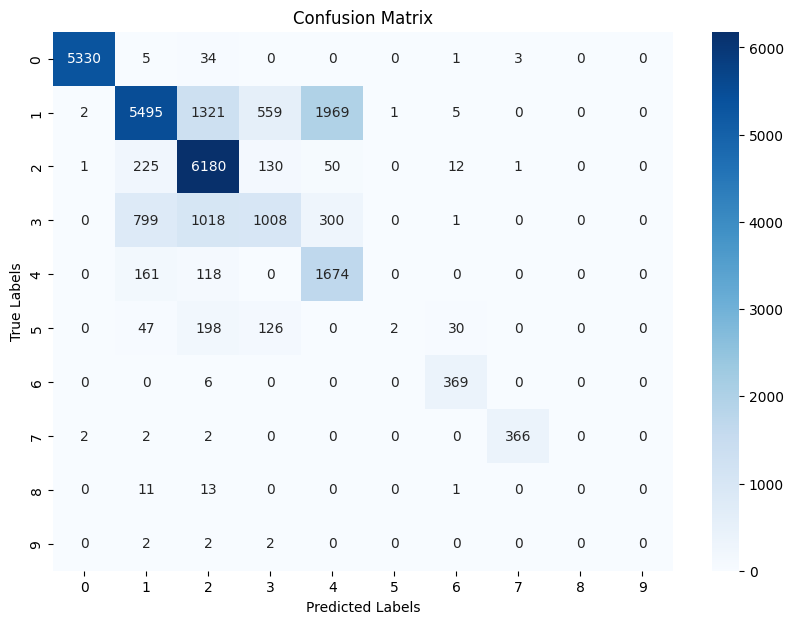

Start Round 7 ...
client_0: Loss = 0.5267, Accuracy = 0.7637
client_1: Loss = 0.5299, Accuracy = 0.7622
client_2: Loss = 0.5274, Accuracy = 0.7593
client_3: Loss = 0.5207, Accuracy = 0.7645
client_4: Loss = 0.5319, Accuracy = 0.7579
After round 7, train_loss = 0.5681, train_acc = 0.7374, dev_loss = 0.5668, dev_acc = 0.7394, test_loss = 0.5678, test_acc = 0.7379
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9983    0.9966    0.9974     17961
           1     0.8802    0.5141    0.6491     31246
           2     0.8989    0.8019    0.8476     21586
           3     0.4132    0.7590    0.5351     10324
           4     0.4154    0.9056    0.5695      6672
           5     0.6406    0.0861    0.1519      1428
           6     0.8683    0.9983    0.9288      1143
           7     0.9894    0.9885    0.9889      1128
           8     0.0000    0.0000    0.0000        84
           9     0.0000    0.0000    0.0000         7

 

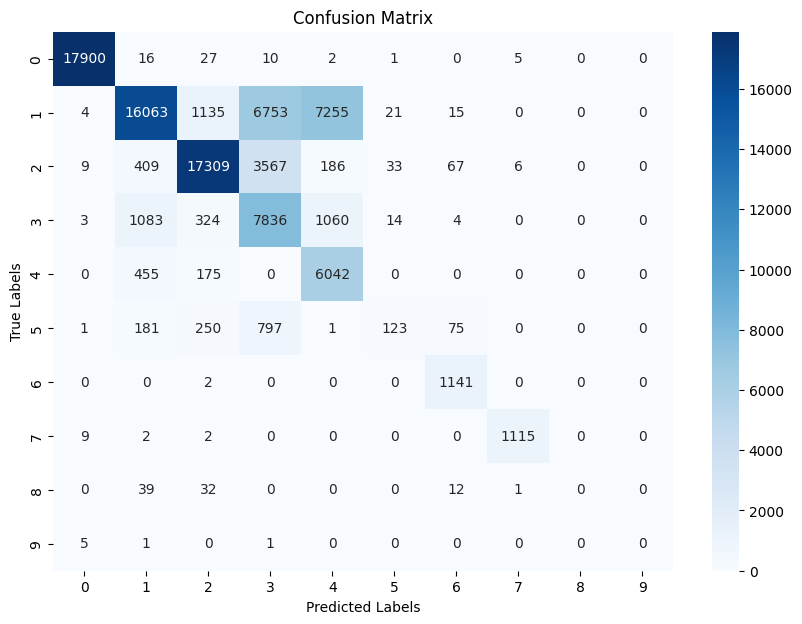

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9973    0.9980      3693
           1     0.8650    0.5141    0.6449      6255
           2     0.8968    0.8085    0.8504      4449
           3     0.4282    0.7563    0.5468      2179
           4     0.4177    0.8955    0.5697      1369
           5     0.6341    0.0825    0.1461       315
           6     0.8724    1.0000    0.9319       253
           7     0.9779    0.9866    0.9822       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7394     18758
   macro avg     0.6091    0.6041    0.5670     18758
weighted avg     0.8121    0.7394    0.7451     18758



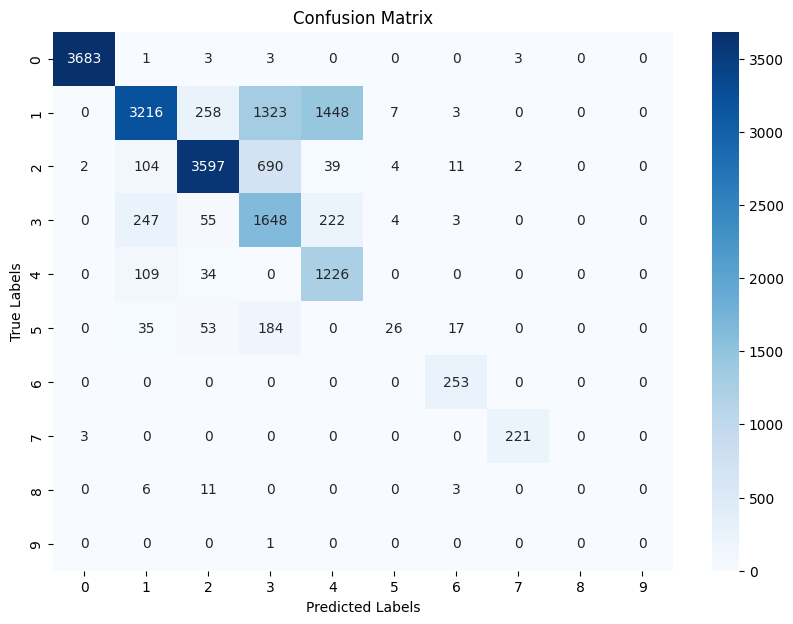

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9974    0.9972    0.9973      5373
           1     0.8747    0.5113    0.6454      9352
           2     0.9022    0.8039    0.8502      6599
           3     0.4170    0.7642    0.5396      3126
           4     0.4122    0.9053    0.5665      1953
           5     0.4677    0.0720    0.1247       403
           6     0.8940    0.9893    0.9392       375
           7     0.9919    0.9866    0.9892       372
           8     0.0000    0.0000    0.0000        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7384     27584
   macro avg     0.5957    0.6030    0.5652     27584
weighted avg     0.8155    0.7384    0.7457     27584



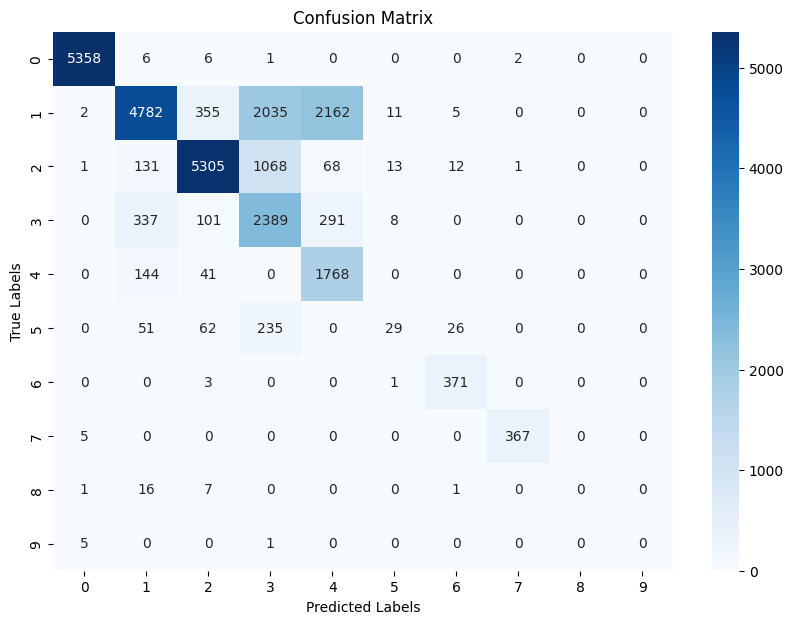

Start Round 8 ...
client_0: Loss = 0.5248, Accuracy = 0.7638
client_1: Loss = 0.5195, Accuracy = 0.7613
client_2: Loss = 0.5067, Accuracy = 0.7695
client_3: Loss = 0.5042, Accuracy = 0.7695
client_4: Loss = 0.5142, Accuracy = 0.7686
After round 8, train_loss = 0.8708, train_acc = 0.6555, dev_loss = 0.8741, dev_acc = 0.6573, test_loss = 0.8679, test_acc = 0.6578
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9933    0.9977    0.9955     17961
           1     0.7727    0.4604    0.5770     31246
           2     0.4870    0.8532    0.6201     21586
           3     0.4558    0.5154    0.4837     10324
           4     0.5729    0.2499    0.3479      6672
           5     0.7969    0.0357    0.0684      1428
           6     0.8682    0.9974    0.9283      1143
           7     0.9798    0.9911    0.9855      1128
           8     0.0000    0.0000    0.0000        84
           9     0.0000    0.0000    0.0000         7

 

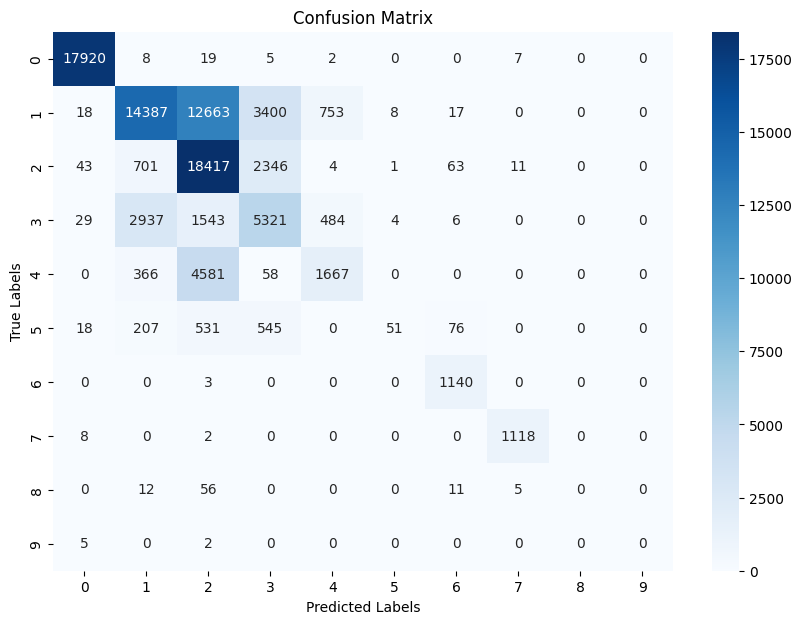

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9933    0.9981    0.9957      3693
           1     0.7638    0.4592    0.5735      6255
           2     0.4921    0.8636    0.6270      4449
           3     0.4690    0.5131    0.4900      2179
           4     0.5735    0.2337    0.3321      1369
           5     0.8421    0.0508    0.0958       315
           6     0.8664    1.0000    0.9284       253
           7     0.9736    0.9866    0.9800       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.6572     18758
   macro avg     0.5974    0.5105    0.5023     18758
weighted avg     0.7008    0.6572    0.6430     18758



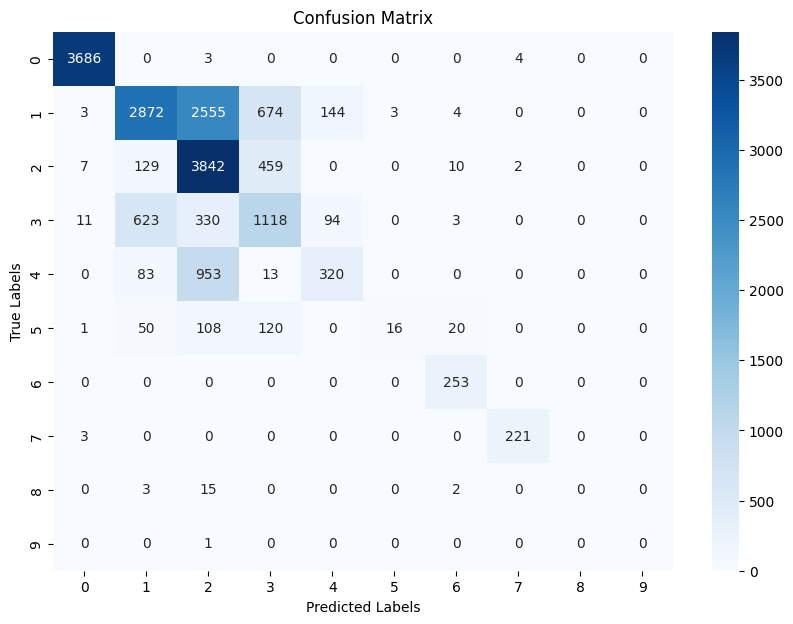

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9919    0.9978    0.9948      5373
           1     0.7701    0.4558    0.5727      9352
           2     0.4946    0.8594    0.6279      6599
           3     0.4678    0.5278    0.4960      3126
           4     0.5412    0.2320    0.3247      1953
           5     0.6818    0.0372    0.0706       403
           6     0.8940    0.9893    0.9392       375
           7     0.9787    0.9866    0.9826       372
           8     1.0000    0.0800    0.1481        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.6581     27584
   macro avg     0.6820    0.5166    0.5157     27584
weighted avg     0.7002    0.6581    0.6445     27584



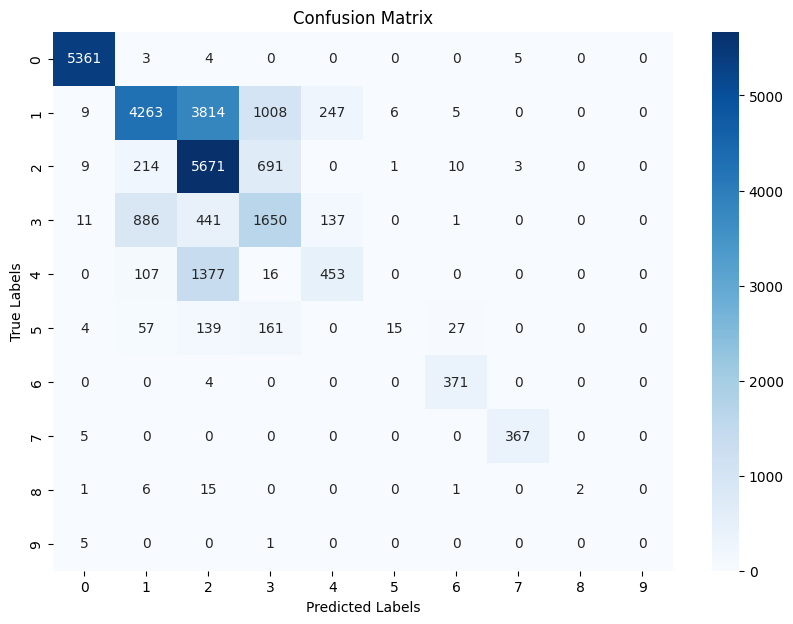

Start Round 9 ...
client_0: Loss = 0.5029, Accuracy = 0.7745
client_1: Loss = 0.5103, Accuracy = 0.7673
client_2: Loss = 0.5082, Accuracy = 0.7697
client_3: Loss = 0.497, Accuracy = 0.7689
client_4: Loss = 0.5088, Accuracy = 0.768
After round 9, train_loss = 0.5172, train_acc = 0.7743, dev_loss = 0.5224, dev_acc = 0.7699, test_loss = 0.5167, test_acc = 0.7724
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9766    0.9987    0.9875     17961
           1     0.6797    0.8704    0.7633     31246
           2     0.8766    0.8148    0.8446     21586
           3     0.5188    0.4074    0.4564     10324
           4     0.6619    0.2433    0.3558      6672
           5     0.8095    0.0595    0.1109      1428
           6     0.8630    0.9974    0.9253      1143
           7     0.9833    0.9911    0.9872      1128
           8     1.0000    0.1310    0.2316        84
           9     0.0000    0.0000    0.0000         7

   

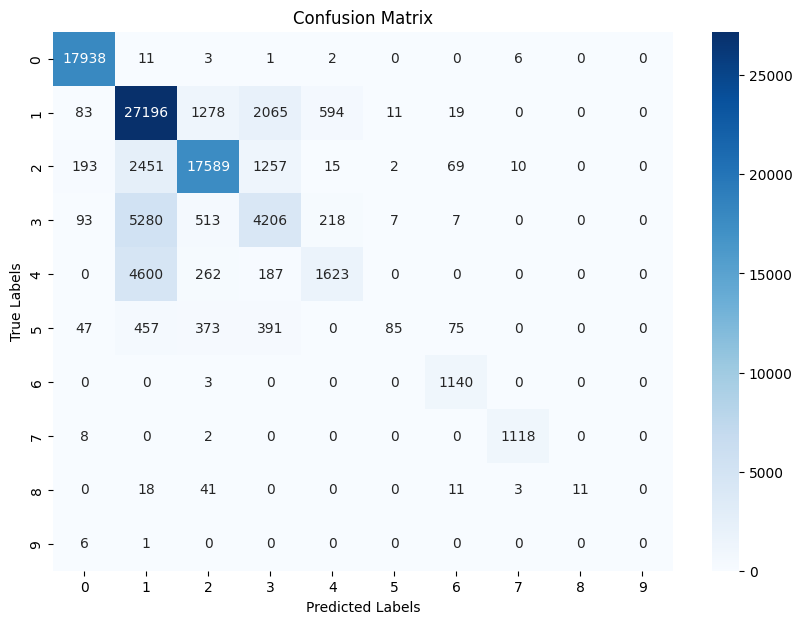

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9759    0.9989    0.9873      3693
           1     0.6673    0.8647    0.7533      6255
           2     0.8816    0.8249    0.8523      4449
           3     0.5145    0.3983    0.4490      2179
           4     0.6562    0.2286    0.3391      1369
           5     0.7778    0.0667    0.1228       315
           6     0.8601    0.9960    0.9231       253
           7     0.9822    0.9866    0.9844       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7700     18758
   macro avg     0.6316    0.5365    0.5411     18758
weighted avg     0.7678    0.7700    0.7509     18758



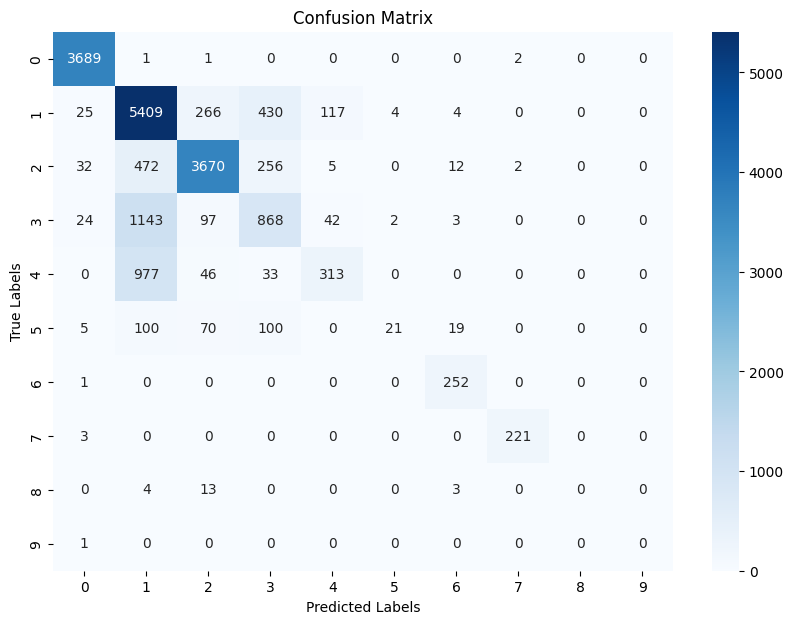

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9719    0.9989    0.9852      5373
           1     0.6767    0.8656    0.7596      9352
           2     0.8795    0.8174    0.8473      6599
           3     0.5175    0.4018    0.4524      3126
           4     0.6173    0.2263    0.3312      1953
           5     0.6552    0.0471    0.0880       403
           6     0.8894    0.9867    0.9355       375
           7     0.9866    0.9866    0.9866       372
           8     1.0000    0.2800    0.4375        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7728     27584
   macro avg     0.7194    0.5610    0.5823     27584
weighted avg     0.7674    0.7728    0.7546     27584



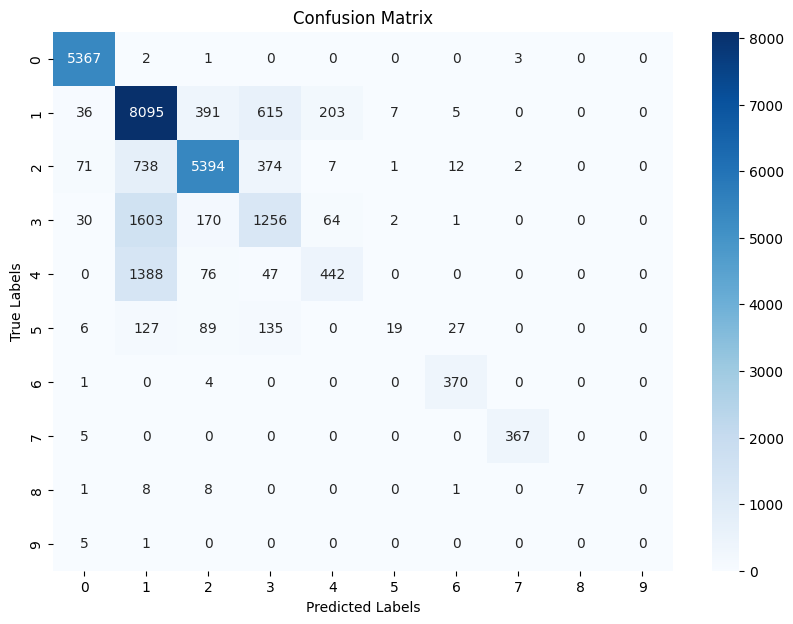

Start Round 10 ...
client_0: Loss = 0.494, Accuracy = 0.7716
client_1: Loss = 0.5167, Accuracy = 0.7678
client_2: Loss = 0.6217, Accuracy = 0.7543
client_3: Loss = 0.4946, Accuracy = 0.7701
client_4: Loss = 0.4957, Accuracy = 0.7715
After round 10, train_loss = 0.4885, train_acc = 0.7795, dev_loss = 0.4944, dev_acc = 0.7765, test_loss = 0.4923, test_acc = 0.7765
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9965    0.9972    0.9968     17961
           1     0.7049    0.8200    0.7581     31246
           2     0.9704    0.7510    0.8467     21586
           3     0.5019    0.4778    0.4896     10324
           4     0.5330    0.6412    0.5821      6672
           5     0.5957    0.1176    0.1965      1428
           6     0.8925    0.9956    0.9413      1143
           7     0.9885    0.9902    0.9894      1128
           8     0.8889    0.0952    0.1720        84
           9     0.0000    0.0000    0.0000         7



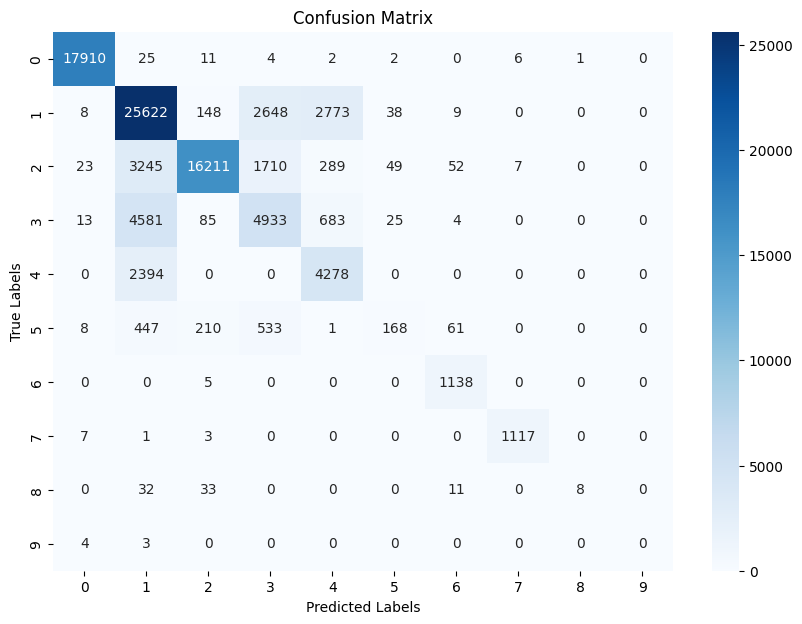

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9973    0.9957    0.9965      3693
           1     0.6905    0.8216    0.7504      6255
           2     0.9655    0.7620    0.8518      4449
           3     0.5075    0.4644    0.4850      2179
           4     0.5359    0.6099    0.5706      1369
           5     0.6441    0.1206    0.2032       315
           6     0.8932    0.9921    0.9401       253
           7     0.9822    0.9866    0.9844       224
           8     1.0000    0.0500    0.0952        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7764     18758
   macro avg     0.7216    0.5803    0.5877     18758
weighted avg     0.7893    0.7764    0.7744     18758



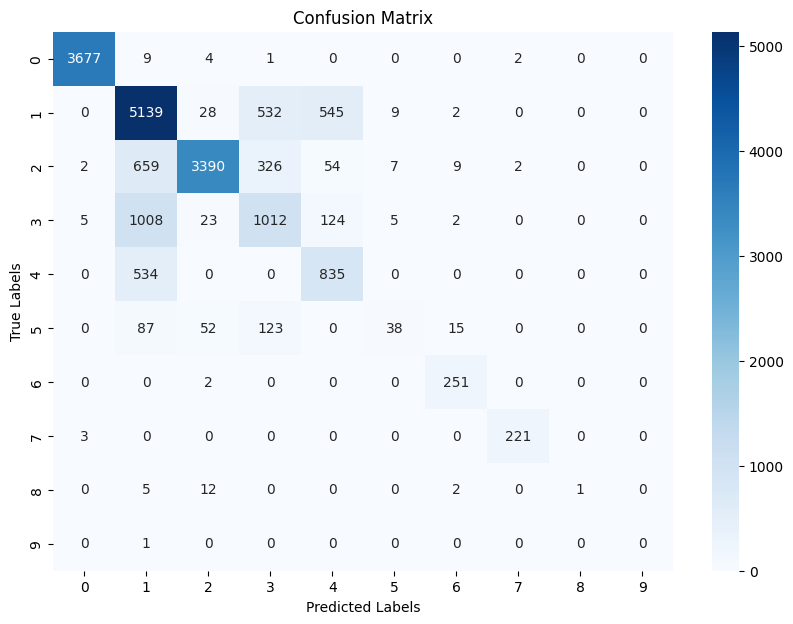

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9954    0.9978    0.9966      5373
           1     0.7010    0.8162    0.7542      9352
           2     0.9693    0.7516    0.8467      6599
           3     0.5054    0.4754    0.4899      3126
           4     0.5090    0.6237    0.5605      1953
           5     0.4419    0.0943    0.1554       403
           6     0.9202    0.9840    0.9510       375
           7     0.9919    0.9839    0.9879       372
           8     0.7500    0.1200    0.2069        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7770     27584
   macro avg     0.6784    0.5847    0.5949     27584
weighted avg     0.7898    0.7770    0.7763     27584



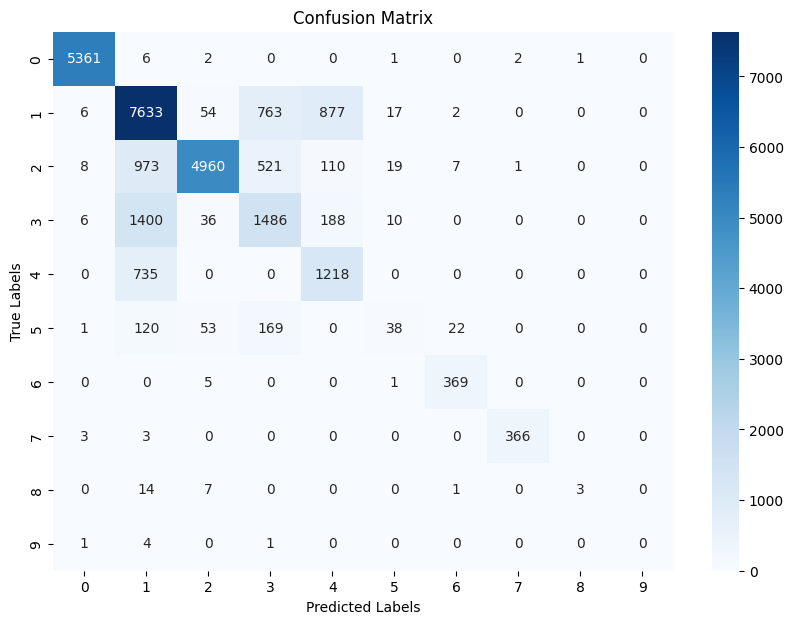

Start Round 11 ...
client_0: Loss = 0.4869, Accuracy = 0.7775
client_1: Loss = 0.4908, Accuracy = 0.7718
client_2: Loss = 0.4946, Accuracy = 0.7703
client_3: Loss = 0.4864, Accuracy = 0.7731
client_4: Loss = 0.4922, Accuracy = 0.7772
After round 11, train_loss = 0.5201, train_acc = 0.7648, dev_loss = 0.5259, dev_acc = 0.7614, test_loss = 0.5196, test_acc = 0.7663
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9963    0.9983    0.9973     17961
           1     0.6936    0.8238    0.7531     31246
           2     0.7996    0.8222    0.8107     21586
           3     0.4935    0.4376    0.4639     10324
           4     0.6758    0.2584    0.3738      6672
           5     0.7951    0.0679    0.1252      1428
           6     0.8795    0.9965    0.9344      1143
           7     0.9850    0.9920    0.9885      1128
           8     0.8889    0.1905    0.3137        84
           9     0.0000    0.0000    0.0000         7


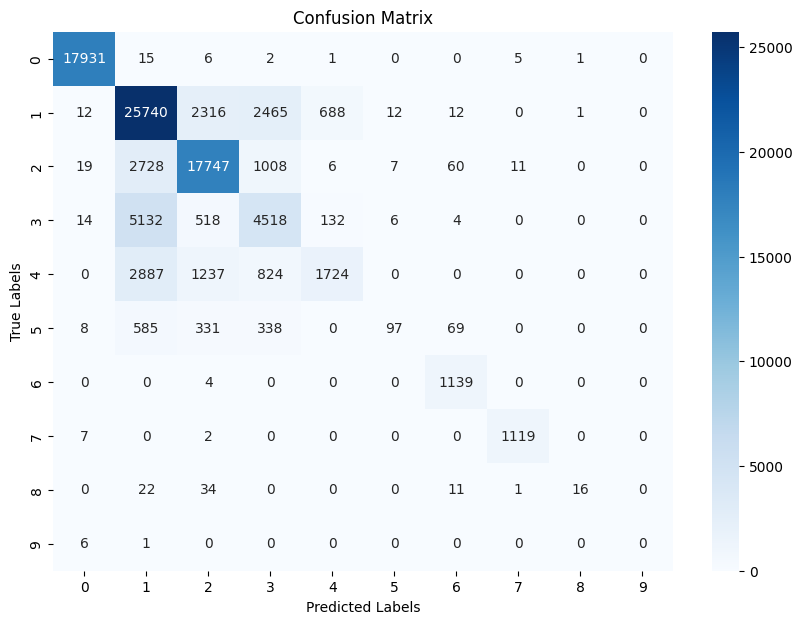

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9959    0.9981    0.9970      3693
           1     0.6804    0.8209    0.7441      6255
           2     0.8065    0.8312    0.8187      4449
           3     0.4893    0.4213    0.4528      2179
           4     0.6817    0.2535    0.3695      1369
           5     0.8214    0.0730    0.1341       315
           6     0.8877    1.0000    0.9405       253
           7     0.9779    0.9866    0.9822       224
           8     1.0000    0.0500    0.0952        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7614     18758
   macro avg     0.7341    0.5435    0.5534     18758
weighted avg     0.7594    0.7614    0.7449     18758



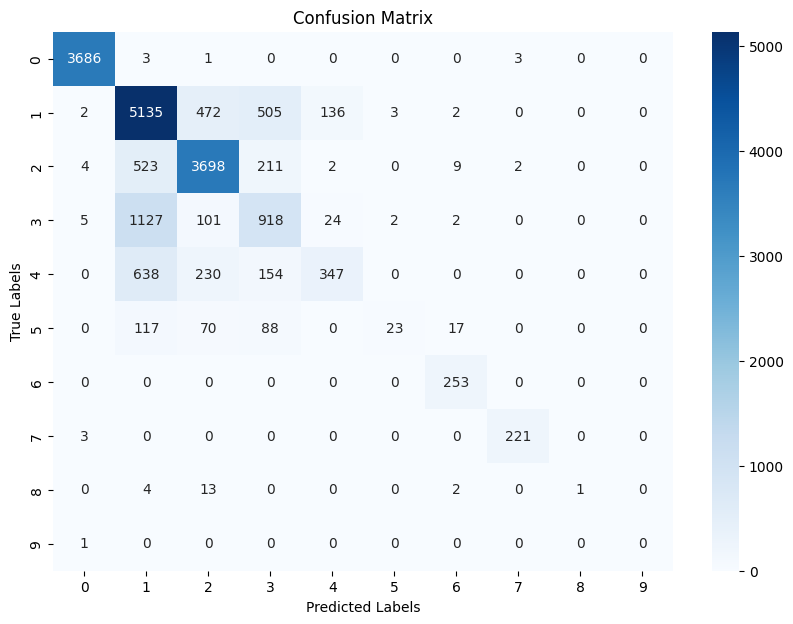

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9943    0.9983    0.9963      5373
           1     0.6913    0.8223    0.7511      9352
           2     0.8085    0.8271    0.8177      6599
           3     0.5037    0.4408    0.4701      3126
           4     0.6529    0.2514    0.3630      1953
           5     0.6286    0.0546    0.1005       403
           6     0.9027    0.9893    0.9440       375
           7     0.9839    0.9866    0.9852       372
           8     1.0000    0.2800    0.4375        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7667     27584
   macro avg     0.7166    0.5650    0.5865     27584
weighted avg     0.7604    0.7667    0.7513     27584



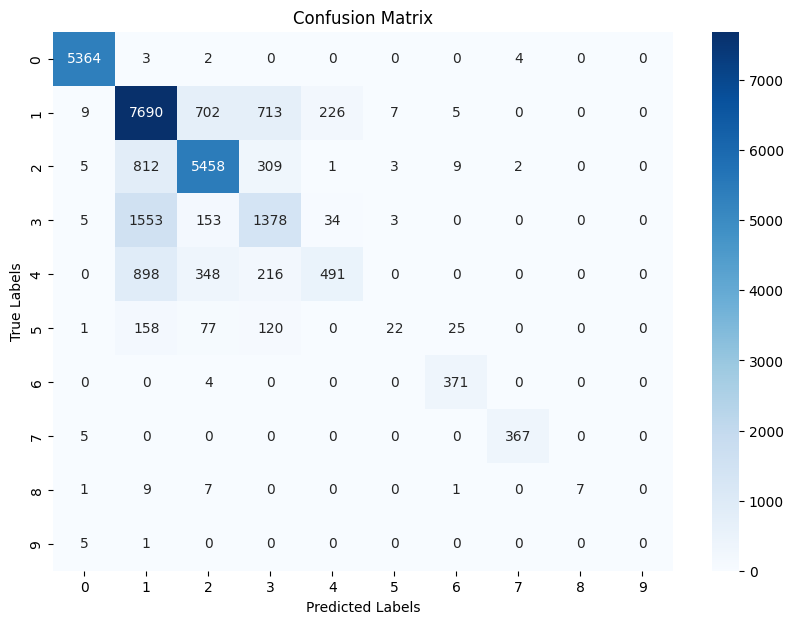

Start Round 12 ...
client_0: Loss = 0.4959, Accuracy = 0.7724
client_1: Loss = 0.4945, Accuracy = 0.7717
client_2: Loss = 0.476, Accuracy = 0.7815
client_3: Loss = 0.4849, Accuracy = 0.7725
client_4: Loss = 0.485, Accuracy = 0.7731
After round 12, train_loss = 0.4673, train_acc = 0.7768, dev_loss = 0.4782, dev_acc = 0.7708, test_loss = 0.4708, test_acc = 0.7742
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9986    0.9974    0.9980     17961
           1     0.6854    0.8444    0.7566     31246
           2     0.8400    0.8322    0.8361     21586
           3     0.6244    0.2602    0.3673     10324
           4     0.5554    0.5652    0.5602      6672
           5     0.6372    0.1008    0.1741      1428
           6     0.8757    0.9983    0.9330      1143
           7     0.9964    0.9876    0.9920      1128
           8     0.8947    0.2024    0.3301        84
           9     0.0000    0.0000    0.0000         7

 

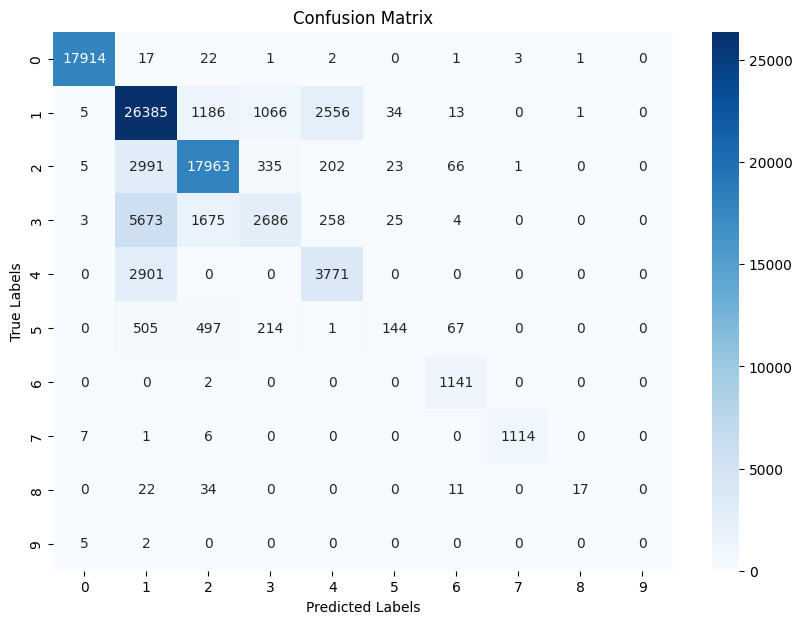

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9970    0.9980      3693
           1     0.6687    0.8430    0.7458      6255
           2     0.8416    0.8350    0.8383      4449
           3     0.6227    0.2492    0.3559      2179
           4     0.5562    0.5457    0.5509      1369
           5     0.6000    0.0857    0.1500       315
           6     0.8754    1.0000    0.9336       253
           7     0.9910    0.9866    0.9888       224
           8     1.0000    0.0500    0.0952        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7710     18758
   macro avg     0.7155    0.5592    0.5657     18758
weighted avg     0.7670    0.7710    0.7526     18758



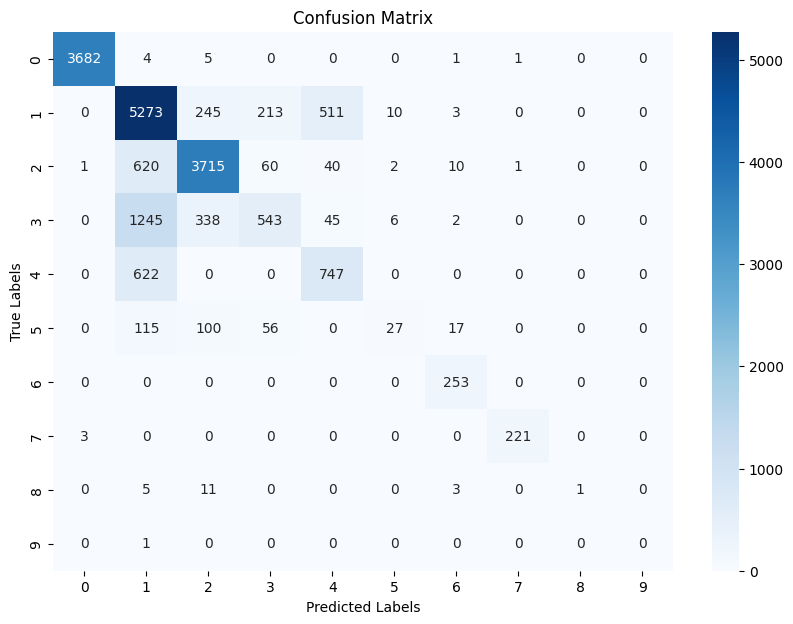

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9976    0.9977      5373
           1     0.6809    0.8384    0.7515      9352
           2     0.8435    0.8322    0.8378      6599
           3     0.6184    0.2566    0.3626      3126
           4     0.5385    0.5591    0.5486      1953
           5     0.4933    0.0918    0.1548       403
           6     0.9049    0.9893    0.9452       375
           7     0.9973    0.9812    0.9892       372
           8     0.7778    0.2800    0.4118        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7746     27584
   macro avg     0.6852    0.5826    0.5999     27584
weighted avg     0.7688    0.7746    0.7583     27584



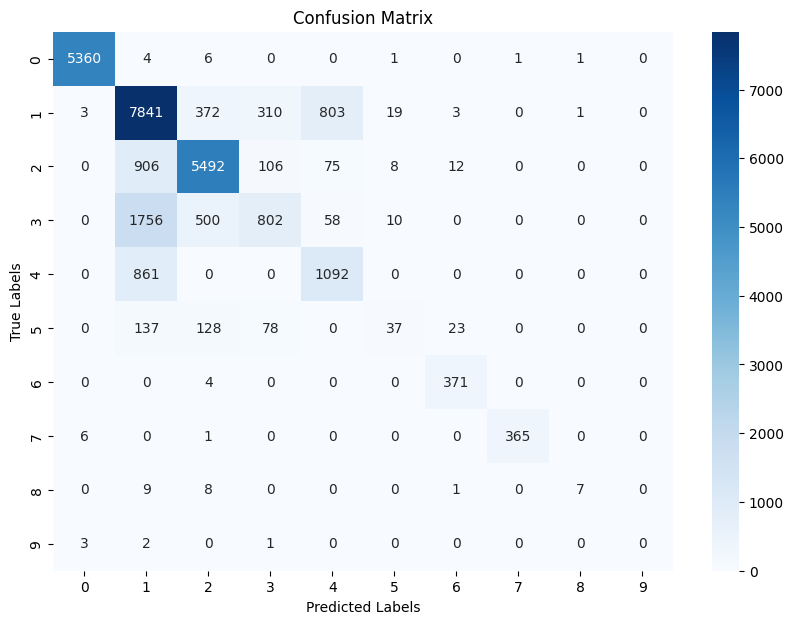

Start Round 13 ...
client_0: Loss = 0.4873, Accuracy = 0.7794
client_1: Loss = 0.4868, Accuracy = 0.7746
client_2: Loss = 0.5145, Accuracy = 0.771
client_3: Loss = 0.4662, Accuracy = 0.7822
client_4: Loss = 0.477, Accuracy = 0.7796
After round 13, train_loss = 0.5388, train_acc = 0.7736, dev_loss = 0.5442, dev_acc = 0.7711, test_loss = 0.5398, test_acc = 0.7694
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9700    0.9847     17961
           1     0.7274    0.8017    0.7628     31246
           2     0.9305    0.7787    0.8478     21586
           3     0.4545    0.5489    0.4972     10324
           4     0.5376    0.5132    0.5251      6672
           5     0.5177    0.1331    0.2117      1428
           6     0.8907    0.9983    0.9414      1143
           7     0.9833    0.9911    0.9872      1128
           8     0.7500    0.2500    0.3750        84
           9     0.0000    0.0000    0.0000         7

 

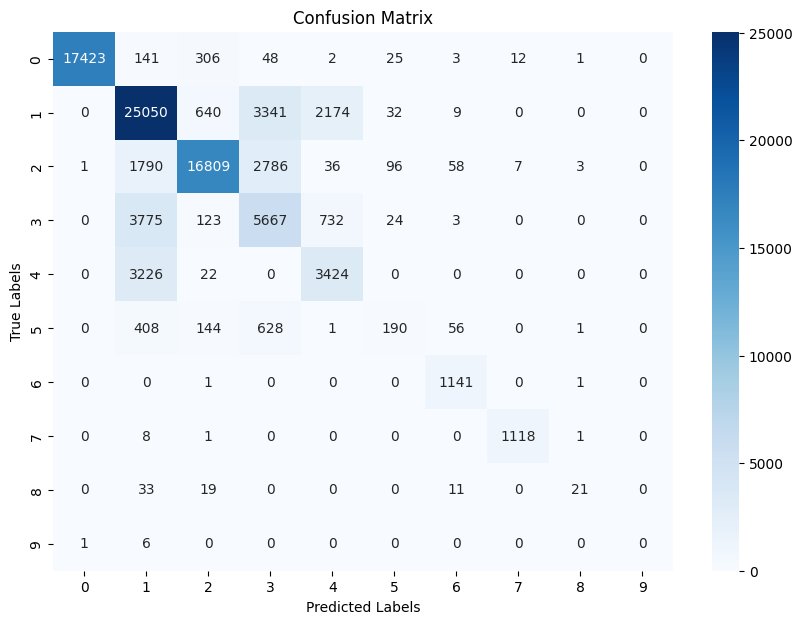

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9662    0.9828      3693
           1     0.7129    0.7984    0.7532      6255
           2     0.9282    0.7930    0.8553      4449
           3     0.4677    0.5443    0.5031      2179
           4     0.5296    0.4828    0.5052      1369
           5     0.5783    0.1524    0.2412       315
           6     0.8908    1.0000    0.9423       253
           7     0.9694    0.9911    0.9801       224
           8     0.5000    0.1000    0.1667        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7710     18758
   macro avg     0.6577    0.5828    0.5930     18758
weighted avg     0.7816    0.7710    0.7715     18758



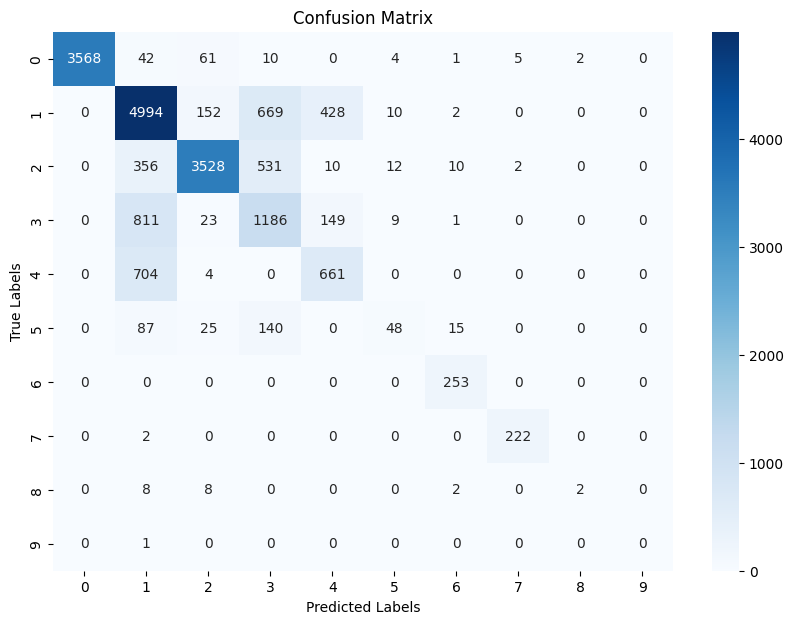

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9663    0.9828      5373
           1     0.7214    0.7964    0.7570      9352
           2     0.9318    0.7800    0.8491      6599
           3     0.4539    0.5461    0.4957      3126
           4     0.5110    0.4869    0.4987      1953
           5     0.3543    0.1117    0.1698       403
           6     0.9071    0.9893    0.9464       375
           7     0.9839    0.9866    0.9852       372
           8     0.5455    0.2400    0.3333        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7698     27584
   macro avg     0.6409    0.5903    0.6018     27584
weighted avg     0.7811    0.7698    0.7717     27584



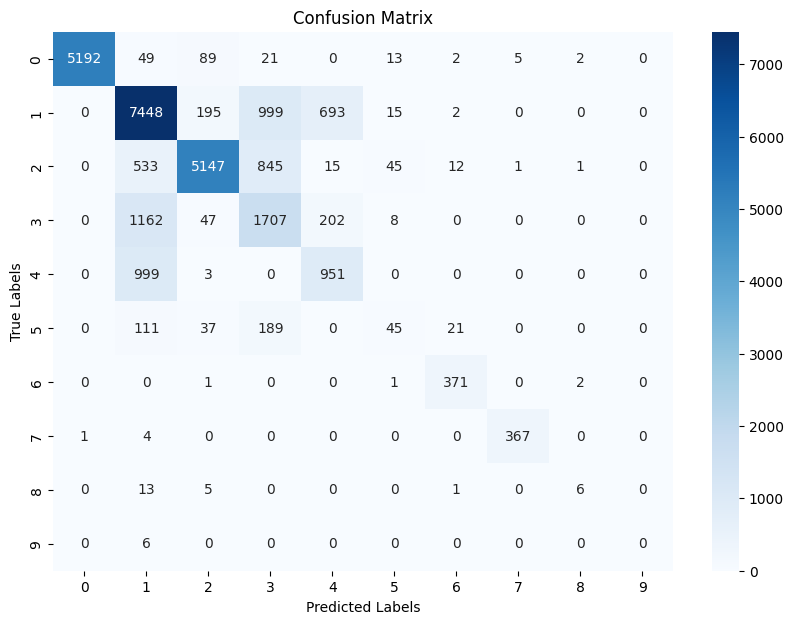

Start Round 14 ...
client_0: Loss = 0.4679, Accuracy = 0.7826
client_1: Loss = 0.4798, Accuracy = 0.7765
client_2: Loss = 0.4684, Accuracy = 0.7846
client_3: Loss = 0.4676, Accuracy = 0.7772
client_4: Loss = 0.4799, Accuracy = 0.7752
After round 14, train_loss = 0.4403, train_acc = 0.7931, dev_loss = 0.4474, dev_acc = 0.7888, test_loss = 0.4423, test_acc = 0.7924
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9982    0.9980     17961
           1     0.7563    0.8023    0.7787     31246
           2     0.8722    0.8549    0.8634     21586
           3     0.4933    0.6015    0.5421     10324
           4     0.6294    0.3766    0.4713      6672
           5     0.6026    0.1296    0.2133      1428
           6     0.8932    0.9956    0.9417      1143
           7     0.9955    0.9894    0.9924      1128
           8     0.9000    0.2143    0.3462        84
           9     0.0000    0.0000    0.0000         7


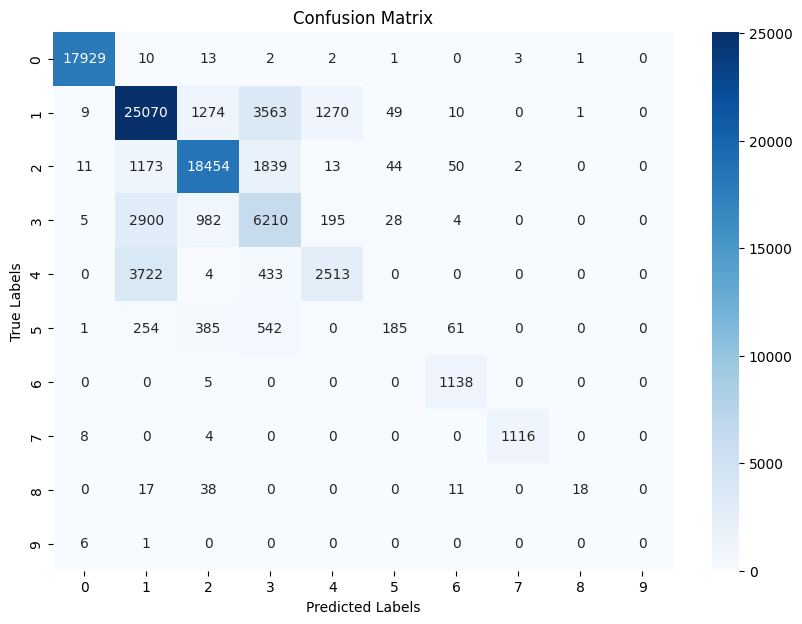

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9984    0.9982      3693
           1     0.7382    0.8026    0.7691      6255
           2     0.8735    0.8584    0.8659      4449
           3     0.4994    0.5833    0.5381      2179
           4     0.6247    0.3587    0.4557      1369
           5     0.6034    0.1111    0.1877       315
           6     0.9036    1.0000    0.9493       253
           7     0.9910    0.9866    0.9888       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7888     18758
   macro avg     0.6232    0.5699    0.5753     18758
weighted avg     0.7876    0.7888    0.7819     18758



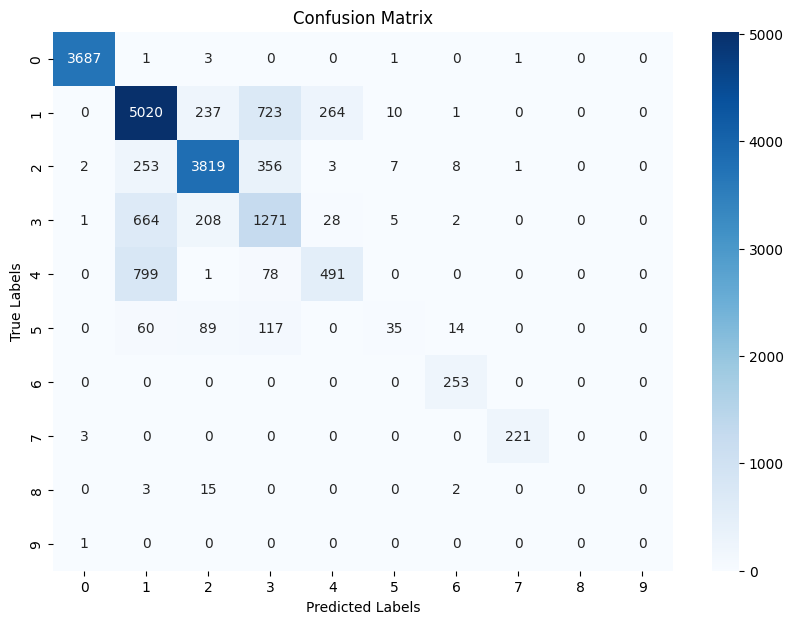

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9967    0.9983    0.9975      5373
           1     0.7511    0.8014    0.7754      9352
           2     0.8750    0.8536    0.8642      6599
           3     0.4991    0.6027    0.5460      3126
           4     0.6200    0.3625    0.4575      1953
           5     0.4783    0.1092    0.1778       403
           6     0.9227    0.9867    0.9536       375
           7     0.9973    0.9839    0.9905       372
           8     0.8750    0.2800    0.4242        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7929     27584
   macro avg     0.7015    0.5978    0.6187     27584
weighted avg     0.7923    0.7929    0.7875     27584



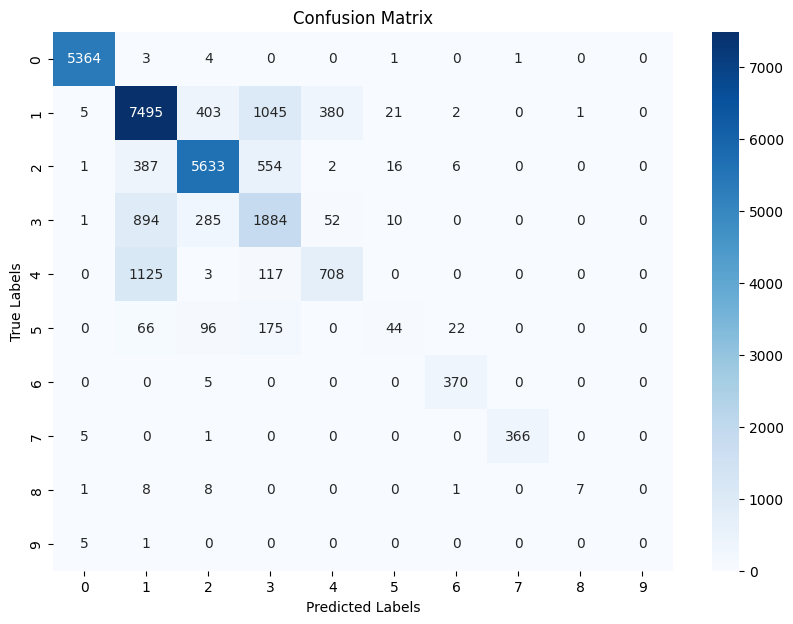

Start Round 15 ...
client_0: Loss = 0.4548, Accuracy = 0.7898
client_1: Loss = 0.4721, Accuracy = 0.7817
client_2: Loss = 0.4632, Accuracy = 0.7848
client_3: Loss = 0.461, Accuracy = 0.7801
client_4: Loss = 0.4838, Accuracy = 0.7776
After round 15, train_loss = 0.5266, train_acc = 0.7456, dev_loss = 0.5294, dev_acc = 0.7459, test_loss = 0.5260, test_acc = 0.7461
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9987    0.9983     17961
           1     0.8478    0.5662    0.6790     31246
           2     0.8939    0.7868    0.8370     21586
           3     0.4169    0.7601    0.5384     10324
           4     0.4444    0.7764    0.5652      6672
           5     0.4467    0.2521    0.3223      1428
           6     0.8763    0.9983    0.9333      1143
           7     0.9964    0.9885    0.9924      1128
           8     0.8889    0.2857    0.4324        84
           9     0.0000    0.0000    0.0000         7



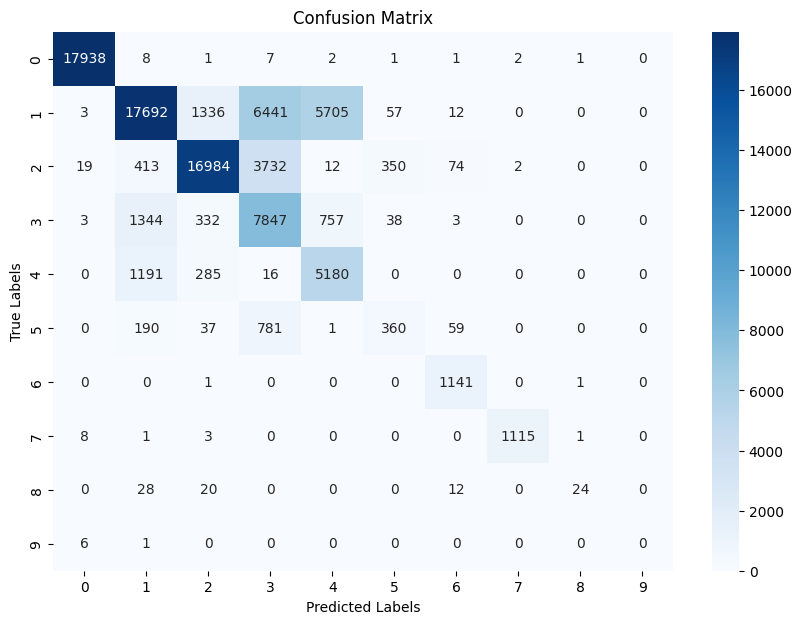

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9978    0.9981    0.9980      3693
           1     0.8327    0.5618    0.6709      6255
           2     0.8895    0.7979    0.8412      4449
           3     0.4321    0.7540    0.5494      2179
           4     0.4403    0.7597    0.5575      1369
           5     0.4545    0.2540    0.3259       315
           6     0.8785    1.0000    0.9353       253
           7     0.9910    0.9866    0.9888       224
           8     1.0000    0.1000    0.1818        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7458     18758
   macro avg     0.6917    0.6212    0.6049     18758
weighted avg     0.7998    0.7458    0.7543     18758



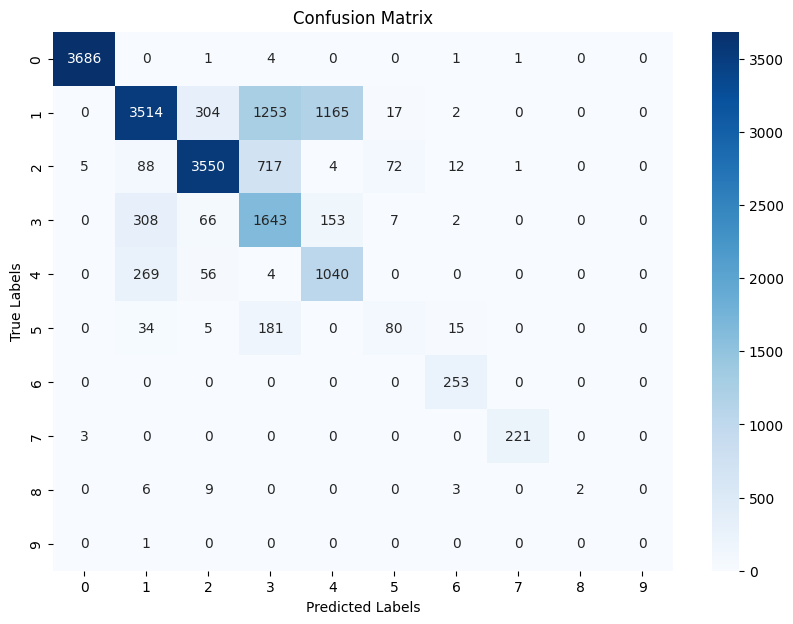

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9965    0.9987    0.9976      5373
           1     0.8426    0.5657    0.6769      9352
           2     0.8943    0.7895    0.8386      6599
           3     0.4250    0.7694    0.5475      3126
           4     0.4400    0.7655    0.5588      1953
           5     0.3173    0.1960    0.2423       403
           6     0.9029    0.9920    0.9454       375
           7     0.9973    0.9839    0.9905       372
           8     0.7000    0.2800    0.4000        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7464     27584
   macro avg     0.6516    0.6341    0.6198     27584
weighted avg     0.8040    0.7464    0.7562     27584



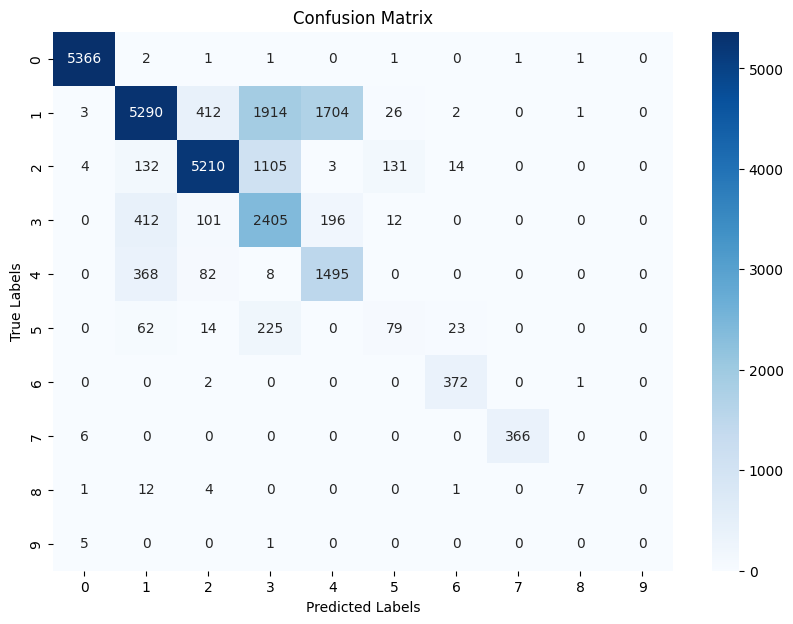

Start Round 16 ...
client_0: Loss = 0.457, Accuracy = 0.787
client_1: Loss = 0.4673, Accuracy = 0.7766
client_2: Loss = 0.4519, Accuracy = 0.7914
client_3: Loss = 0.4614, Accuracy = 0.7814
client_4: Loss = 0.4669, Accuracy = 0.7789
After round 16, train_loss = 0.5263, train_acc = 0.7546, dev_loss = 0.5428, dev_acc = 0.7490, test_loss = 0.5262, test_acc = 0.7564
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9967    0.9980     17961
           1     0.6220    0.9365    0.7475     31246
           2     0.8254    0.8482    0.8366     21586
           3     0.8333    0.0005    0.0010     10324
           4     0.6546    0.1923    0.2973      6672
           5     0.9412    0.0448    0.0856      1428
           6     0.9065    0.9930    0.9478      1143
           7     0.9902    0.9894    0.9898      1128
           8     0.9167    0.2619    0.4074        84
           9     0.0000    0.0000    0.0000         7

 

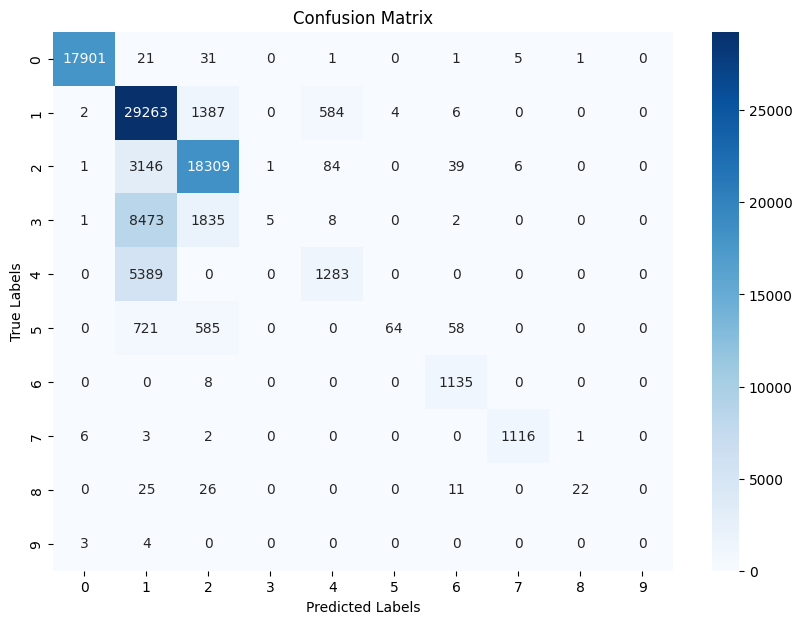

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9951    0.9970      3693
           1     0.6106    0.9353    0.7389      6255
           2     0.8242    0.8514    0.8376      4449
           3     1.0000    0.0005    0.0009      2179
           4     0.6509    0.1812    0.2834      1369
           5     0.9048    0.0603    0.1131       315
           6     0.9084    0.9802    0.9430       253
           7     0.9822    0.9866    0.9844       224
           8     1.0000    0.1000    0.1818        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7491     18758
   macro avg     0.7880    0.5091    0.5080     18758
weighted avg     0.7997    0.7491    0.6887     18758



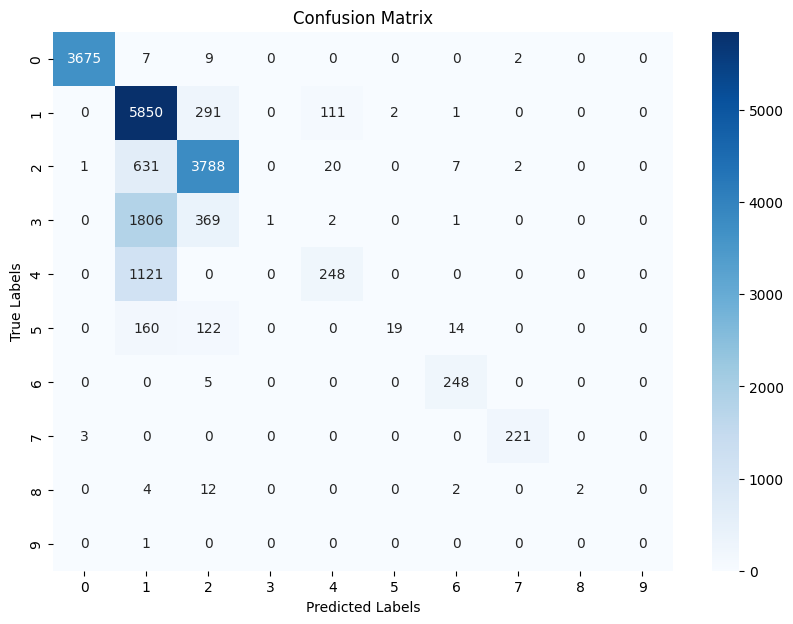

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9965    0.9978      5373
           1     0.6221    0.9361    0.7474      9352
           2     0.8329    0.8527    0.8427      6599
           3     0.5000    0.0006    0.0013      3126
           4     0.6301    0.1910    0.2931      1953
           5     0.7143    0.0372    0.0708       403
           6     0.9270    0.9813    0.9534       375
           7     0.9946    0.9866    0.9906       372
           8     0.7143    0.4000    0.5128        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7566     27584
   macro avg     0.6934    0.5382    0.5410     27584
weighted avg     0.7431    0.7566    0.6981     27584



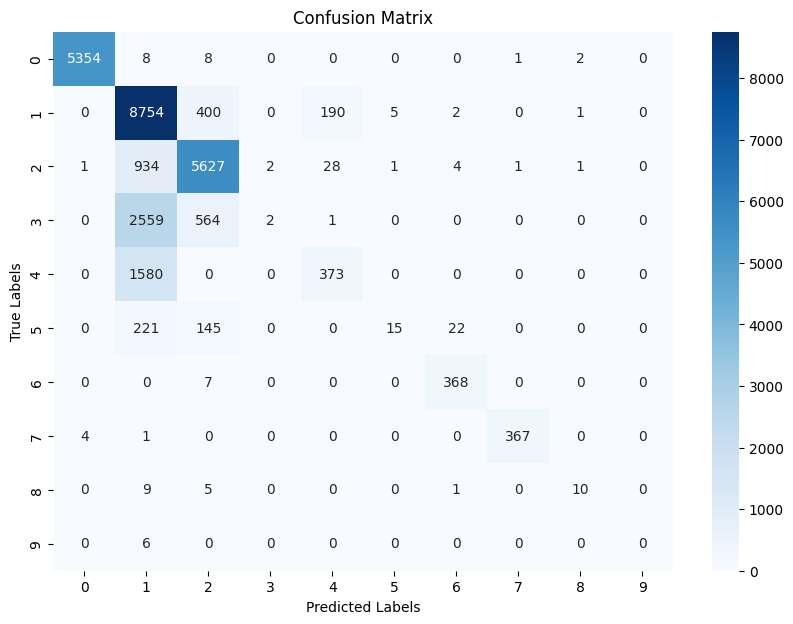

Start Round 17 ...
client_0: Loss = 0.449, Accuracy = 0.7892
client_1: Loss = 0.6179, Accuracy = 0.7627
client_2: Loss = 0.45, Accuracy = 0.7901
client_3: Loss = 0.4503, Accuracy = 0.7864
client_4: Loss = 0.4869, Accuracy = 0.7802
After round 17, train_loss = 0.4534, train_acc = 0.7873, dev_loss = 0.4603, dev_acc = 0.7833, test_loss = 0.4557, test_acc = 0.7856
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9876    0.9937     17961
           1     0.8534    0.6736    0.7529     31246
           2     0.9191    0.8178    0.8655     21586
           3     0.4473    0.7898    0.5712     10324
           4     0.5577    0.7467    0.6385      6672
           5     0.6207    0.1765    0.2748      1428
           6     0.9081    0.9939    0.9490      1143
           7     0.9911    0.9911    0.9911      1128
           8     0.9500    0.2262    0.3654        84
           9     0.0000    0.0000    0.0000         7

  

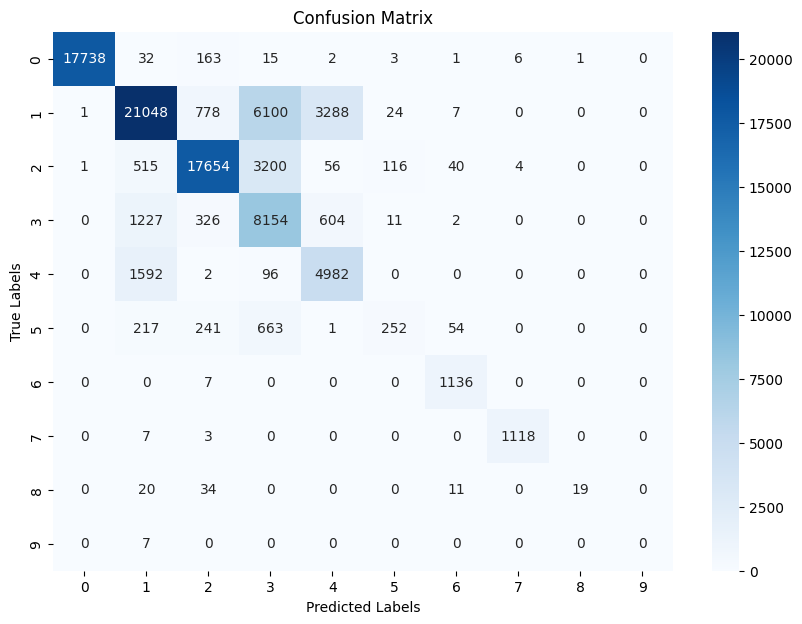

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9846    0.9922      3693
           1     0.8293    0.6726    0.7428      6255
           2     0.9149    0.8215    0.8657      4449
           3     0.4579    0.7710    0.5746      2179
           4     0.5494    0.7195    0.6230      1369
           5     0.6333    0.1810    0.2815       315
           6     0.9025    0.9881    0.9434       253
           7     0.9911    0.9911    0.9911       224
           8     1.0000    0.0500    0.0952        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7833     18758
   macro avg     0.7278    0.6179    0.6109     18758
weighted avg     0.8194    0.7833    0.7900     18758



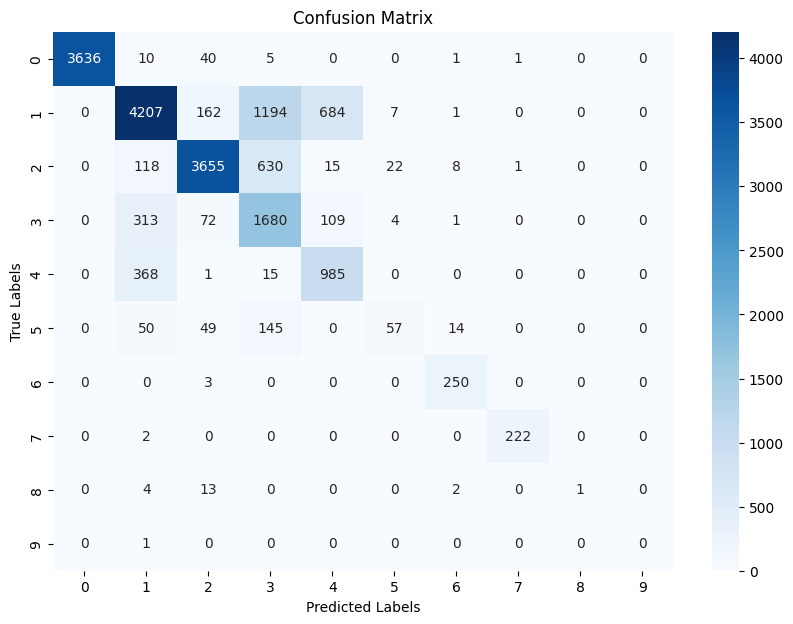

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9864    0.9930      5373
           1     0.8459    0.6709    0.7483      9352
           2     0.9192    0.8172    0.8652      6599
           3     0.4520    0.7940    0.5761      3126
           4     0.5477    0.7343    0.6274      1953
           5     0.4867    0.1365    0.2132       403
           6     0.9270    0.9813    0.9534       375
           7     0.9973    0.9866    0.9919       372
           8     0.7273    0.3200    0.4444        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7860     27584
   macro avg     0.6903    0.6427    0.6413     27584
weighted avg     0.8252    0.7860    0.7937     27584



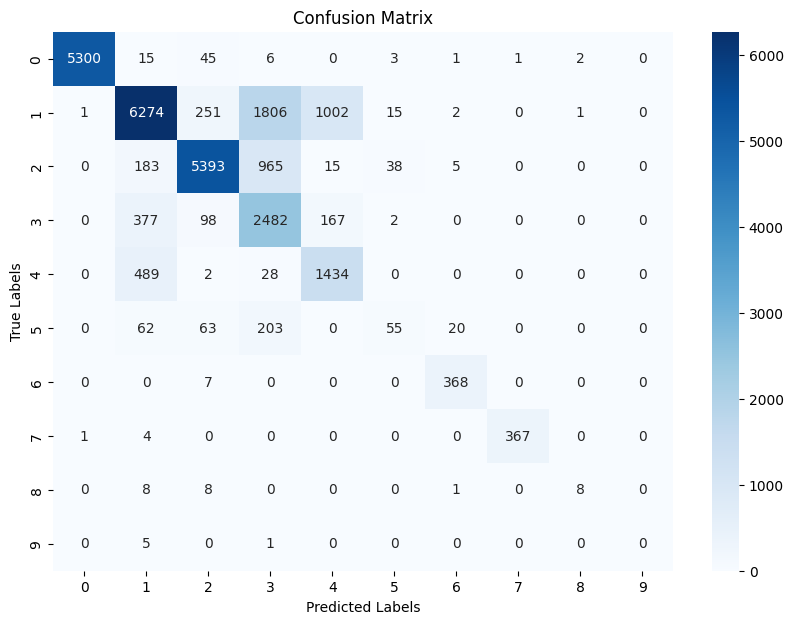

Start Round 18 ...
client_0: Loss = 0.4583, Accuracy = 0.7863
client_1: Loss = 0.4593, Accuracy = 0.7881
client_2: Loss = 0.4765, Accuracy = 0.7838
client_3: Loss = 0.4405, Accuracy = 0.789
client_4: Loss = 0.4572, Accuracy = 0.7861
After round 18, train_loss = 0.4333, train_acc = 0.7911, dev_loss = 0.4420, dev_acc = 0.7852, test_loss = 0.4372, test_acc = 0.7901
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9985    0.9987    0.9986     17961
           1     0.7662    0.7427    0.7543     31246
           2     0.9385    0.8058    0.8671     21586
           3     0.5037    0.5390    0.5208     10324
           4     0.5363    0.8588    0.6603      6672
           5     0.5358    0.2409    0.3324      1428
           6     0.8933    0.9965    0.9421      1143
           7     0.9947    0.9894    0.9920      1128
           8     0.9231    0.2857    0.4364        84
           9     0.0000    0.0000    0.0000         7



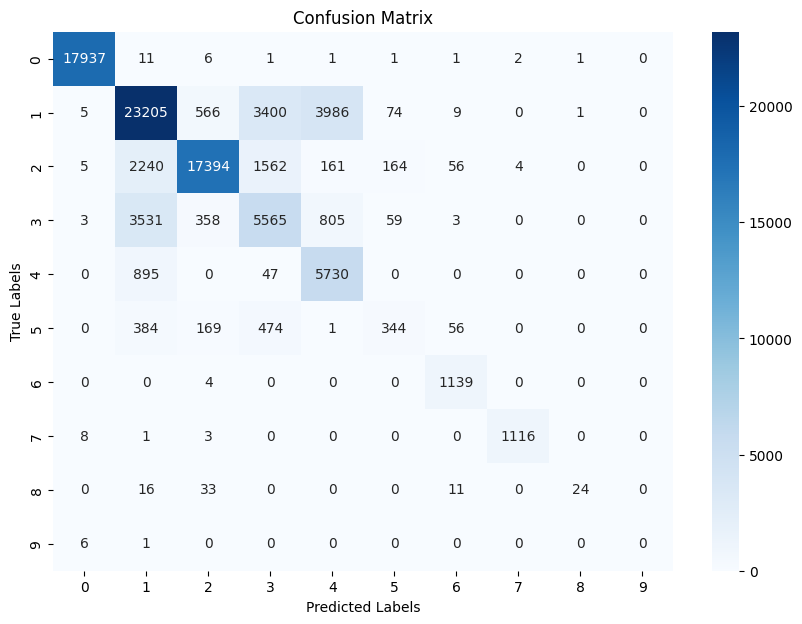

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9984    0.9976    0.9980      3693
           1     0.7491    0.7362    0.7426      6255
           2     0.9357    0.8114    0.8691      4449
           3     0.5040    0.5177    0.5108      2179
           4     0.5328    0.8422    0.6527      1369
           5     0.4934    0.2381    0.3212       315
           6     0.8940    1.0000    0.9440       253
           7     0.9910    0.9866    0.9888       224
           8     1.0000    0.1500    0.2609        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7854     18758
   macro avg     0.7099    0.6280    0.6288     18758
weighted avg     0.7990    0.7854    0.7874     18758



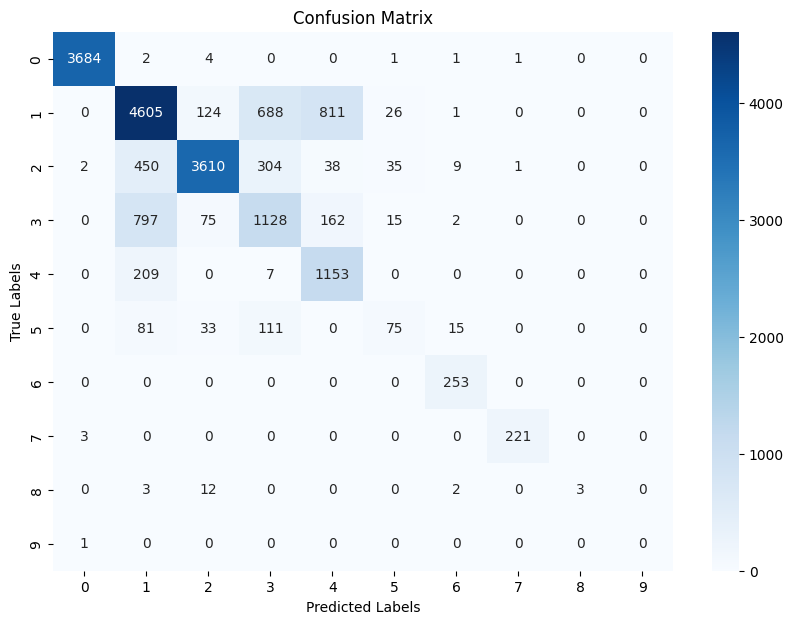

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9970    0.9985    0.9978      5373
           1     0.7637    0.7426    0.7530      9352
           2     0.9408    0.8074    0.8690      6599
           3     0.5086    0.5409    0.5243      3126
           4     0.5230    0.8459    0.6463      1953
           5     0.4261    0.1861    0.2591       403
           6     0.9115    0.9893    0.9488       375
           7     0.9973    0.9839    0.9905       372
           8     0.8333    0.4000    0.5405        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7904     27584
   macro avg     0.6901    0.6495    0.6529     27584
weighted avg     0.8057    0.7904    0.7933     27584



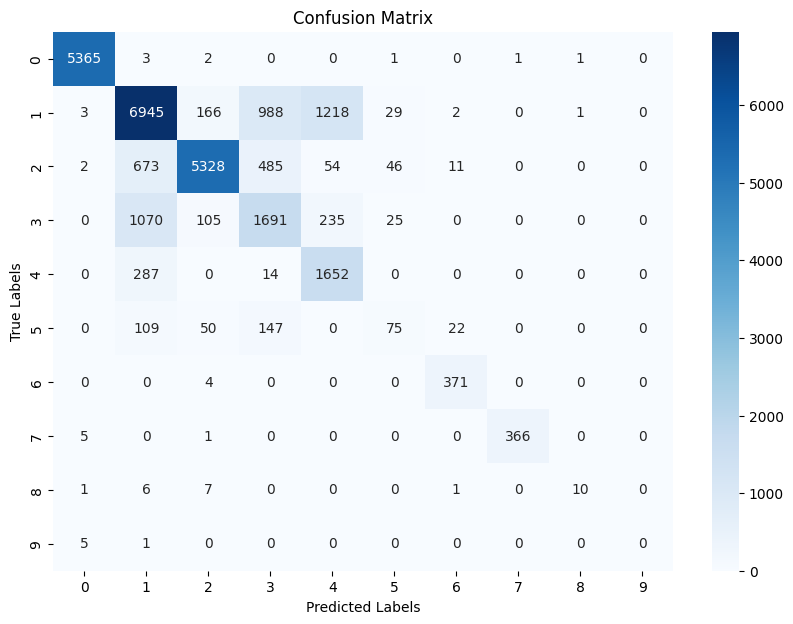

Start Round 19 ...
client_0: Loss = 0.4449, Accuracy = 0.7905
client_1: Loss = 0.4727, Accuracy = 0.7747
client_2: Loss = 0.4519, Accuracy = 0.7903
client_3: Loss = 0.4483, Accuracy = 0.7861
client_4: Loss = 0.442, Accuracy = 0.7877
After round 19, train_loss = 0.4125, train_acc = 0.8035, dev_loss = 0.4235, dev_acc = 0.7997, test_loss = 0.4161, test_acc = 0.8015
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9985    0.9988     17961
           1     0.7567    0.8246    0.7892     31246
           2     0.9287    0.8170    0.8693     21586
           3     0.4975    0.6215    0.5526     10324
           4     0.6822    0.4871    0.5684      6672
           5     0.5859    0.2150    0.3145      1428
           6     0.9065    0.9930    0.9478      1143
           7     0.9955    0.9902    0.9929      1128
           8     0.9286    0.3095    0.4643        84
           9     0.0000    0.0000    0.0000         7



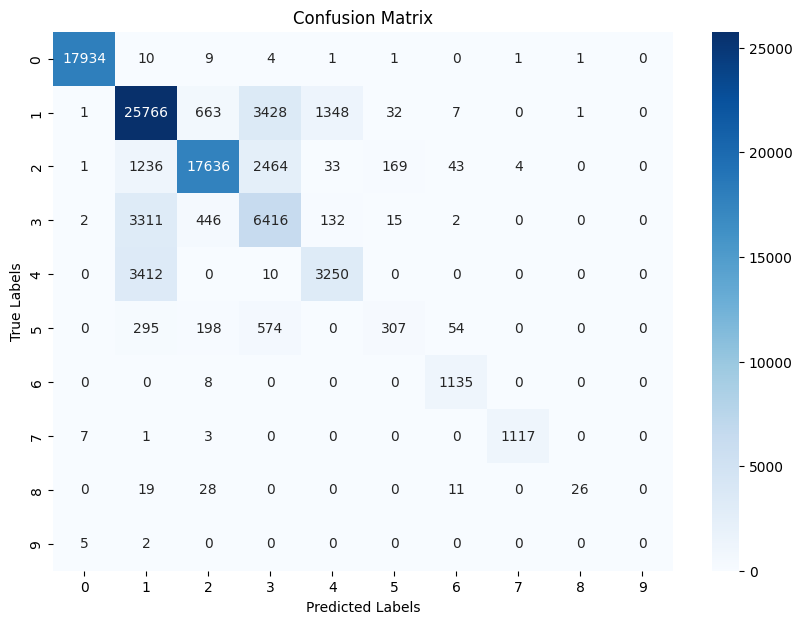

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9978    0.9984      3693
           1     0.7412    0.8227    0.7798      6255
           2     0.9238    0.8231    0.8706      4449
           3     0.5109    0.6145    0.5579      2179
           4     0.6785    0.4595    0.5479      1369
           5     0.5841    0.2095    0.3084       315
           6     0.9094    0.9921    0.9490       253
           7     0.9910    0.9866    0.9888       224
           8     1.0000    0.1000    0.1818        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7997     18758
   macro avg     0.7338    0.6006    0.6183     18758
weighted avg     0.8068    0.7997    0.7978     18758



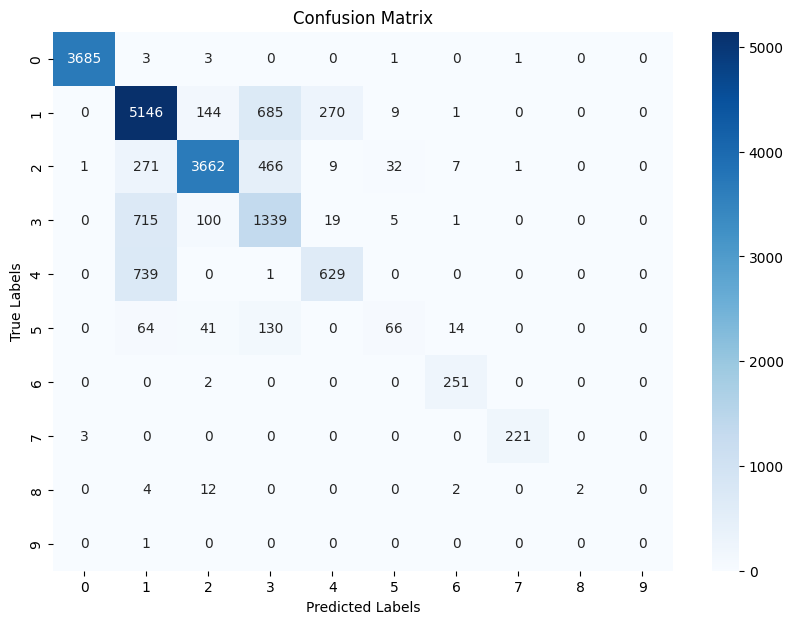

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9980    0.9987    0.9983      5373
           1     0.7528    0.8182    0.7841      9352
           2     0.9288    0.8165    0.8690      6599
           3     0.5053    0.6299    0.5607      3126
           4     0.6521    0.4752    0.5498      1953
           5     0.4653    0.1663    0.2450       403
           6     0.9318    0.9840    0.9572       375
           7     0.9973    0.9866    0.9919       372
           8     0.8462    0.4400    0.5789        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.8018     27584
   macro avg     0.7077    0.6315    0.6535     27584
weighted avg     0.8089    0.8018    0.8012     27584



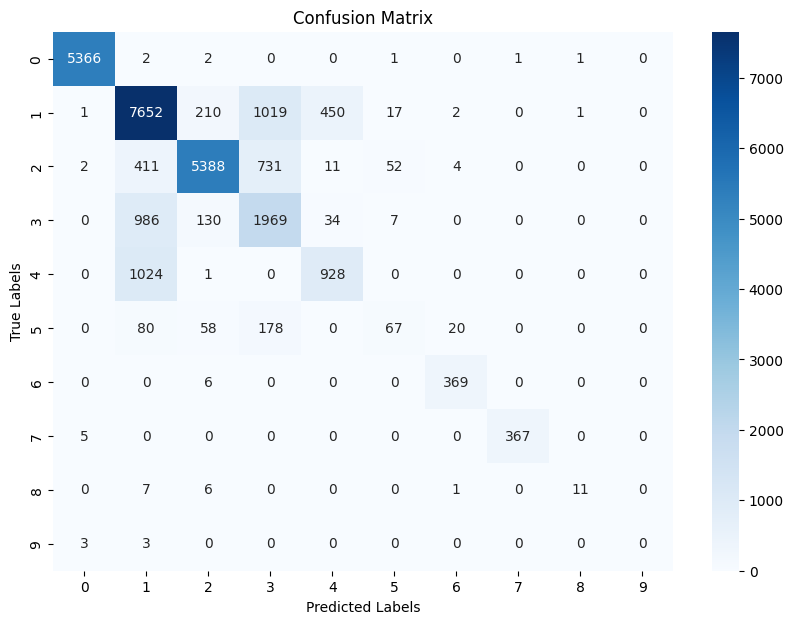

Start Round 20 ...
client_0: Loss = 0.4466, Accuracy = 0.7929
client_1: Loss = 0.4454, Accuracy = 0.789
client_2: Loss = 0.4361, Accuracy = 0.7981
client_3: Loss = 0.4655, Accuracy = 0.7815
client_4: Loss = 0.4412, Accuracy = 0.7914
After round 20, train_loss = 0.4424, train_acc = 0.7956, dev_loss = 0.4558, dev_acc = 0.7900, test_loss = 0.4431, test_acc = 0.7963
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9967    0.9978     17961
           1     0.7726    0.8152    0.7933     31246
           2     0.7373    0.9672    0.8367     21586
           3     0.6221    0.3792    0.4712     10324
           4     0.6521    0.3495    0.4551      6672
           5     0.7632    0.0609    0.1128      1428
           6     0.9117    0.9851    0.9470      1143
           7     0.9938    0.9894    0.9916      1128
           8     0.8710    0.3214    0.4696        84
           9     0.0000    0.0000    0.0000         7



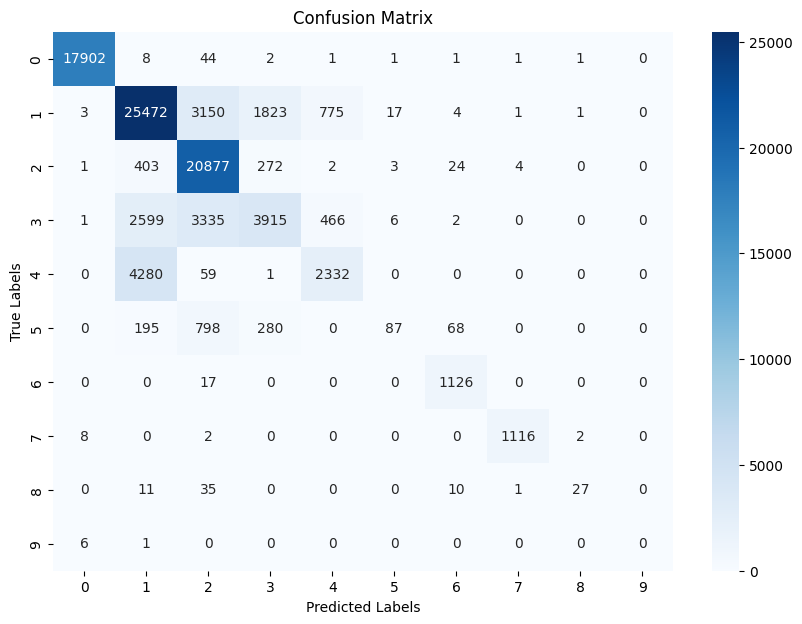

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9946    0.9969      3693
           1     0.7586    0.8152    0.7859      6255
           2     0.7371    0.9685    0.8371      4449
           3     0.6262    0.3713    0.4661      2179
           4     0.6404    0.3265    0.4325      1369
           5     0.6429    0.0571    0.1050       315
           6     0.8926    0.9526    0.9216       253
           7     0.9910    0.9866    0.9888       224
           8     1.0000    0.1500    0.2609        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7901     18758
   macro avg     0.7288    0.5622    0.5795     18758
weighted avg     0.7797    0.7901    0.7688     18758



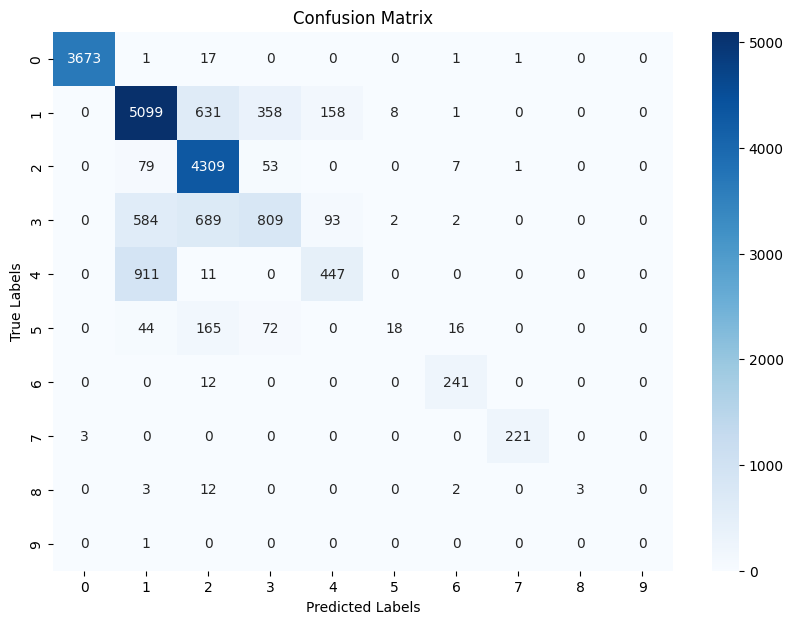

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9965    0.9973      5373
           1     0.7705    0.8115    0.7904      9352
           2     0.7471    0.9676    0.8432      6599
           3     0.6231    0.3967    0.4848      3126
           4     0.6304    0.3292    0.4326      1953
           5     0.5116    0.0546    0.0987       403
           6     0.9231    0.9600    0.9412       375
           7     0.9973    0.9839    0.9905       372
           8     0.8571    0.4800    0.6154        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7965     27584
   macro avg     0.7058    0.5980    0.6194     27584
weighted avg     0.7839    0.7965    0.7777     27584



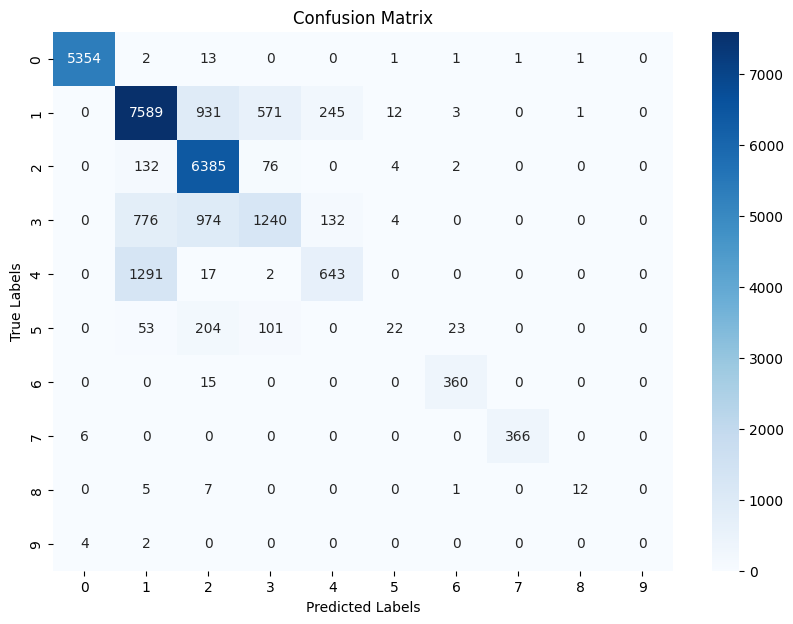

Start Round 21 ...
client_0: Loss = 0.4406, Accuracy = 0.7949
client_1: Loss = 0.4487, Accuracy = 0.7895
client_2: Loss = 0.429, Accuracy = 0.7964
client_3: Loss = 0.4443, Accuracy = 0.7871
client_4: Loss = 0.4405, Accuracy = 0.791
After round 21, train_loss = 0.4658, train_acc = 0.7835, dev_loss = 0.4760, dev_acc = 0.7831, test_loss = 0.4701, test_acc = 0.7838
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9991    0.9986     17961
           1     0.8261    0.6991    0.7573     31246
           2     0.9169    0.7915    0.8496     21586
           3     0.4406    0.7878    0.5652     10324
           4     0.5834    0.6412    0.6109      6672
           5     0.5576    0.1289    0.2093      1428
           6     0.9097    0.9956    0.9507      1143
           7     0.9947    0.9894    0.9920      1128
           8     0.9091    0.3571    0.5128        84
           9     0.0000    0.0000    0.0000         7

 

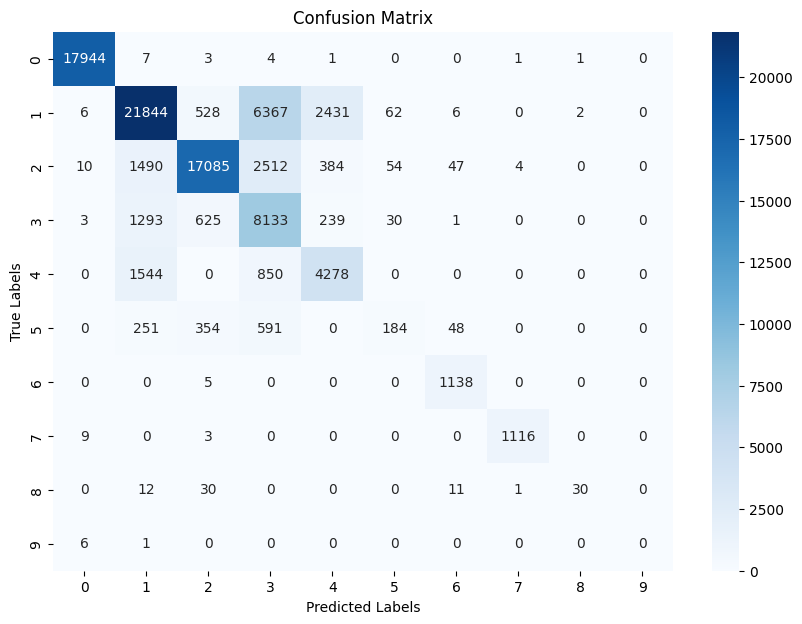

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9981    0.9986    0.9984      3693
           1     0.8147    0.7022    0.7543      6255
           2     0.9146    0.7968    0.8517      4449
           3     0.4540    0.7857    0.5755      2179
           4     0.5762    0.6158    0.5953      1369
           5     0.5593    0.1048    0.1765       315
           6     0.9097    0.9960    0.9509       253
           7     0.9866    0.9866    0.9866       224
           8     1.0000    0.1000    0.1818        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7830     18758
   macro avg     0.7213    0.6086    0.6071     18758
weighted avg     0.8144    0.7830    0.7881     18758



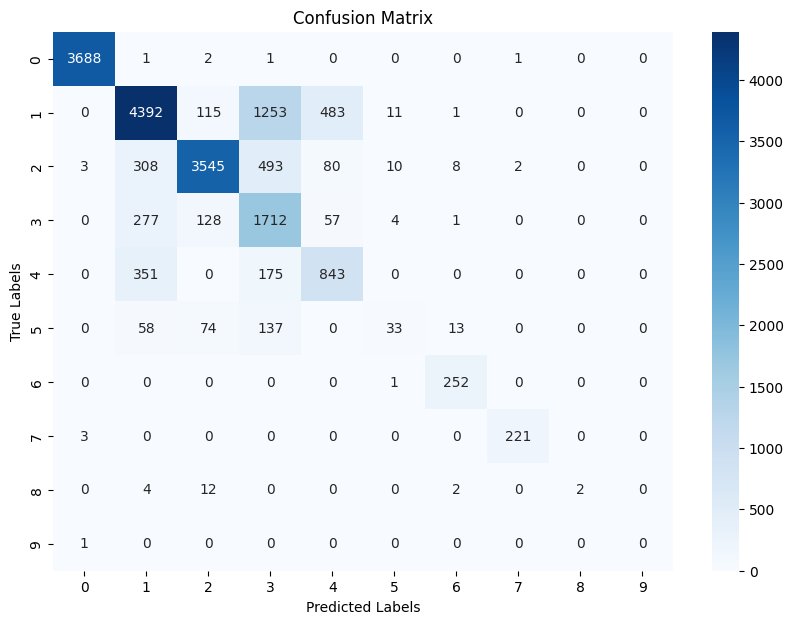

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9968    0.9989    0.9979      5373
           1     0.8242    0.6953    0.7542      9352
           2     0.9242    0.7928    0.8535      6599
           3     0.4494    0.8010    0.5758      3126
           4     0.5599    0.6318    0.5937      1953
           5     0.4316    0.1017    0.1647       403
           6     0.9244    0.9787    0.9508       375
           7     0.9973    0.9839    0.9905       372
           8     0.8667    0.5200    0.6500        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7840     27584
   macro avg     0.6974    0.6504    0.6531     27584
weighted avg     0.8184    0.7840    0.7908     27584



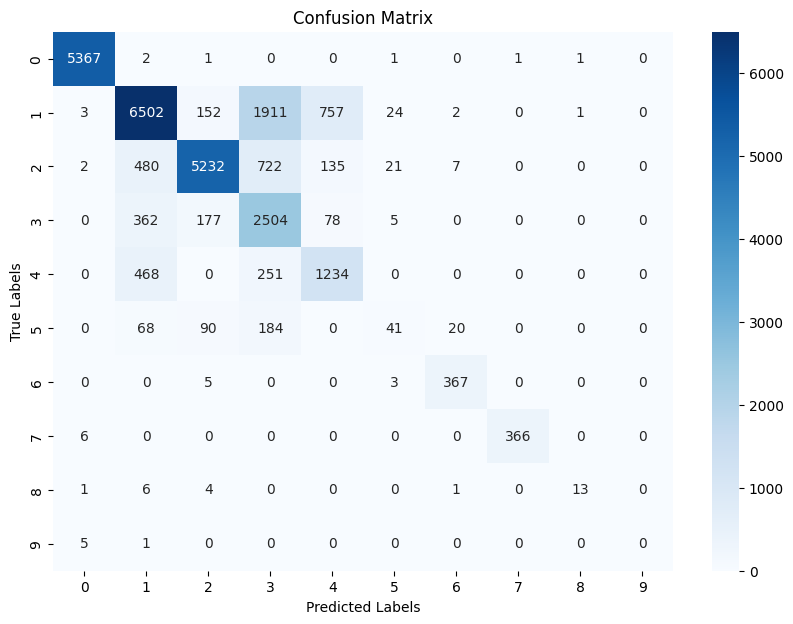

Start Round 22 ...
client_0: Loss = 0.4441, Accuracy = 0.7915
client_1: Loss = 0.4454, Accuracy = 0.7921
client_2: Loss = 0.4262, Accuracy = 0.7963
client_3: Loss = 0.435, Accuracy = 0.7923
client_4: Loss = 0.4428, Accuracy = 0.7918
After round 22, train_loss = 0.4389, train_acc = 0.7895, dev_loss = 0.4469, dev_acc = 0.7860, test_loss = 0.4417, test_acc = 0.7895
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9988    0.9991    0.9989     17961
           1     0.8837    0.6474    0.7473     31246
           2     0.9213    0.8275    0.8719     21586
           3     0.4359    0.8560    0.5776     10324
           4     0.5914    0.7446    0.6592      6672
           5     0.7613    0.1296    0.2214      1428
           6     0.8967    0.9948    0.9432      1143
           7     0.9955    0.9902    0.9929      1128
           8     0.9583    0.2738    0.4259        84
           9     0.0000    0.0000    0.0000         7



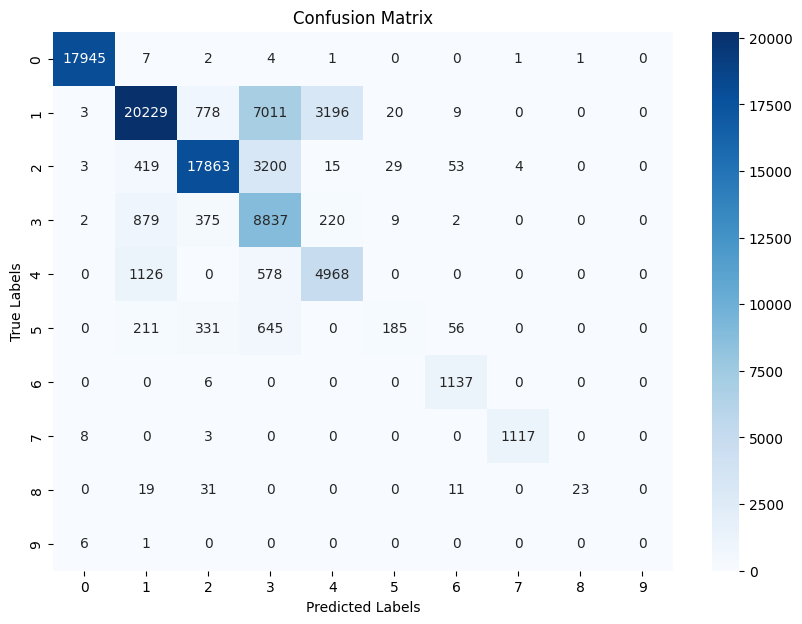

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9984    0.9984    0.9984      3693
           1     0.8655    0.6443    0.7387      6255
           2     0.9143    0.8321    0.8713      4449
           3     0.4457    0.8357    0.5813      2179
           4     0.5776    0.7261    0.6434      1369
           5     0.6800    0.1079    0.1863       315
           6     0.9065    0.9960    0.9492       253
           7     0.9910    0.9866    0.9888       224
           8     1.0000    0.1000    0.1818        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7860     18758
   macro avg     0.7379    0.6227    0.6139     18758
weighted avg     0.8325    0.7860    0.7919     18758



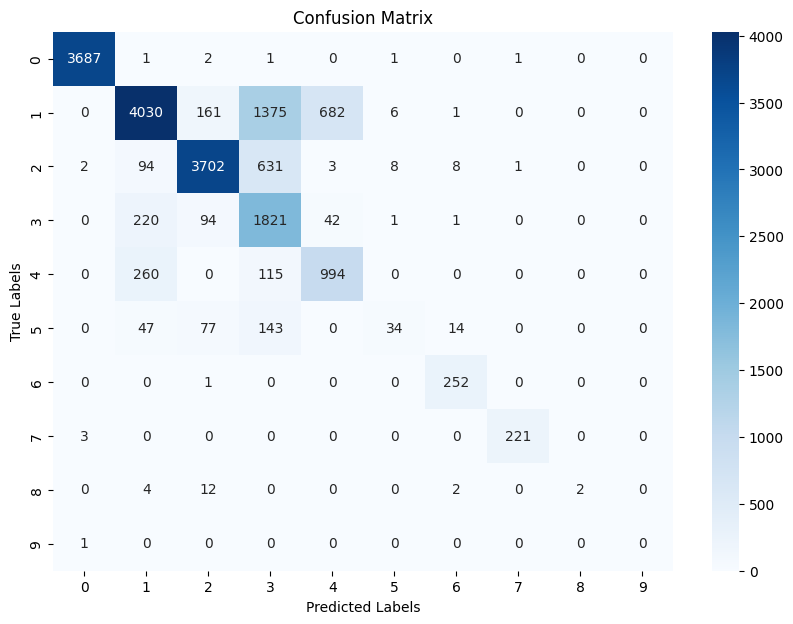

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9970    0.9987    0.9979      5373
           1     0.8778    0.6491    0.7463      9352
           2     0.9260    0.8285    0.8745      6599
           3     0.4397    0.8541    0.5806      3126
           4     0.5796    0.7286    0.6456      1953
           5     0.5616    0.1017    0.1723       403
           6     0.9229    0.9893    0.9550       375
           7     0.9973    0.9866    0.9919       372
           8     0.8462    0.4400    0.5789        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7898     27584
   macro avg     0.7148    0.6577    0.6543     27584
weighted avg     0.8392    0.7898    0.7975     27584



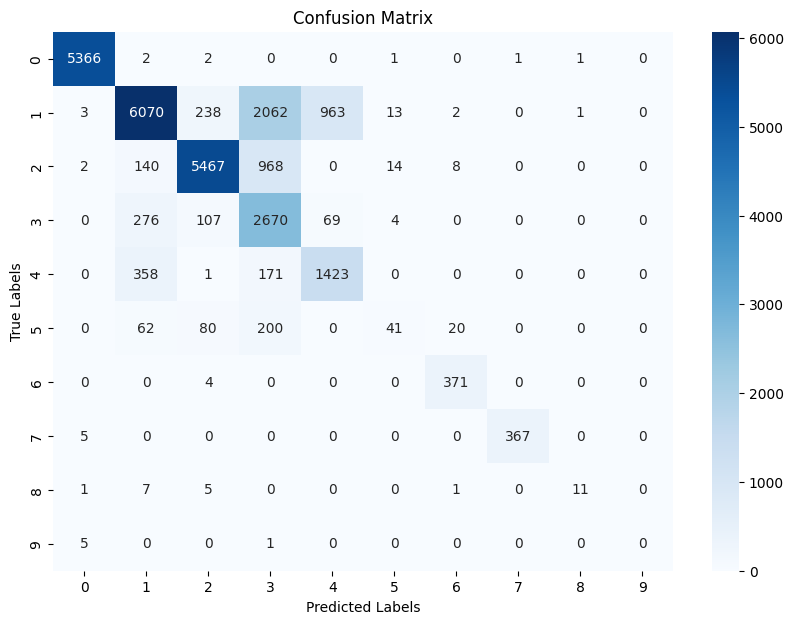

Start Round 23 ...
client_0: Loss = 0.442, Accuracy = 0.7963
client_1: Loss = 0.4371, Accuracy = 0.7939
client_2: Loss = 0.4285, Accuracy = 0.7972
client_3: Loss = 0.4229, Accuracy = 0.7956
client_4: Loss = 0.4405, Accuracy = 0.7928
After round 23, train_loss = 0.4257, train_acc = 0.7977, dev_loss = 0.4367, dev_acc = 0.7917, test_loss = 0.4298, test_acc = 0.7976
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9946    0.9993    0.9969     17961
           1     0.7021    0.8336    0.7622     31246
           2     0.9487    0.8009    0.8685     21586
           3     0.5808    0.4225    0.4892     10324
           4     0.6136    0.7416    0.6716      6672
           5     0.8404    0.1106    0.1955      1428
           6     0.8871    0.9965    0.9386      1143
           7     0.9964    0.9902    0.9933      1128
           8     0.9070    0.4643    0.6142        84
           9     0.0000    0.0000    0.0000         7



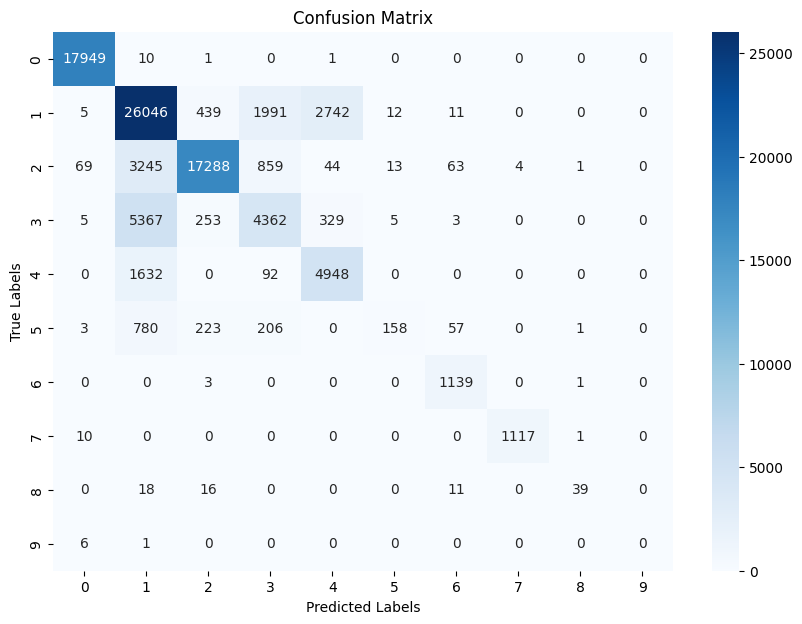

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9941    0.9989    0.9965      3693
           1     0.6857    0.8277    0.7500      6255
           2     0.9420    0.8105    0.8713      4449
           3     0.5889    0.4075    0.4817      2179
           4     0.6093    0.7188    0.6595      1369
           5     0.8333    0.0952    0.1709       315
           6     0.8972    1.0000    0.9458       253
           7     0.9866    0.9866    0.9866       224
           8     1.0000    0.2000    0.3333        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7918     18758
   macro avg     0.7537    0.6045    0.6196     18758
weighted avg     0.7996    0.7918    0.7848     18758



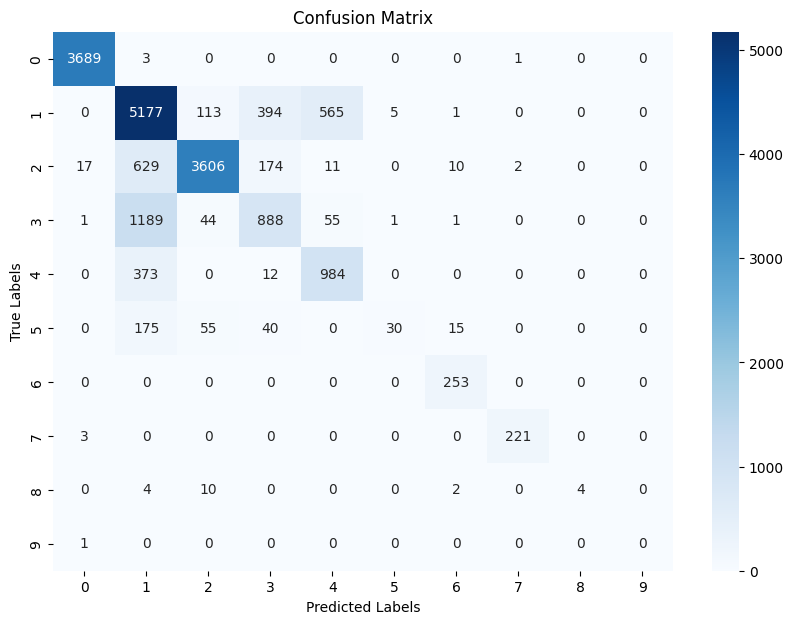

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9917    0.9991    0.9954      5373
           1     0.6999    0.8321    0.7603      9352
           2     0.9536    0.8042    0.8726      6599
           3     0.5906    0.4319    0.4989      3126
           4     0.6019    0.7276    0.6588      1953
           5     0.6875    0.0819    0.1463       403
           6     0.9093    0.9893    0.9476       375
           7     0.9946    0.9812    0.9878       372
           8     0.6667    0.4800    0.5581        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7979     27584
   macro avg     0.7096    0.6327    0.6426     27584
weighted avg     0.8046    0.7979    0.7924     27584



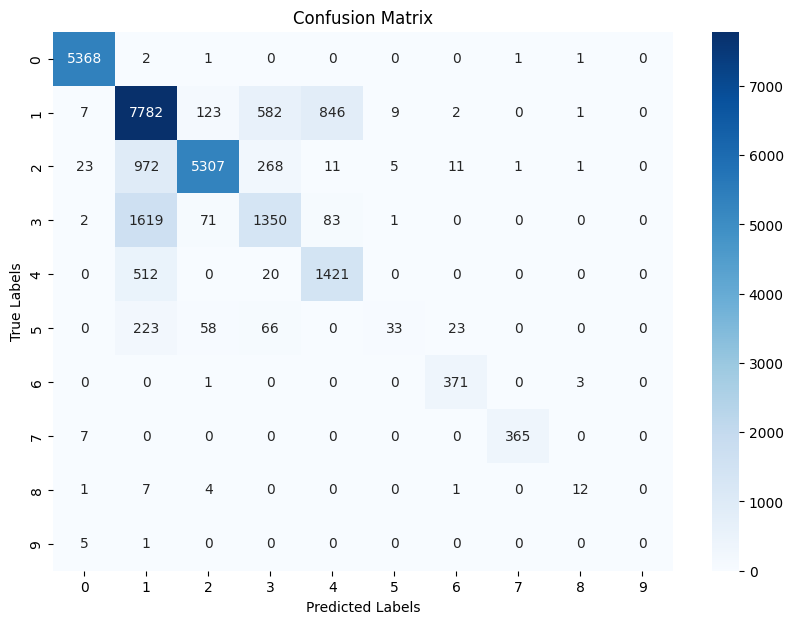

Start Round 24 ...
client_0: Loss = 0.428, Accuracy = 0.7966
client_1: Loss = 0.4323, Accuracy = 0.7954
client_2: Loss = 0.4402, Accuracy = 0.7982
client_3: Loss = 0.4254, Accuracy = 0.7945
client_4: Loss = 0.4352, Accuracy = 0.7956
After round 24, train_loss = 0.4752, train_acc = 0.7744, dev_loss = 0.4907, dev_acc = 0.7641, test_loss = 0.4804, test_acc = 0.7686
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9992    0.9987    0.9990     17961
           1     0.7604    0.7599    0.7602     31246
           2     0.8091    0.8725    0.8396     21586
           3     0.5438    0.3705    0.4407     10324
           4     0.5341    0.5406    0.5373      6672
           5     0.2328    0.4699    0.3114      1428
           6     0.8905    0.9965    0.9405      1143
           7     0.9973    0.9894    0.9933      1128
           8     0.7593    0.4881    0.5942        84
           9     0.0000    0.0000    0.0000         7



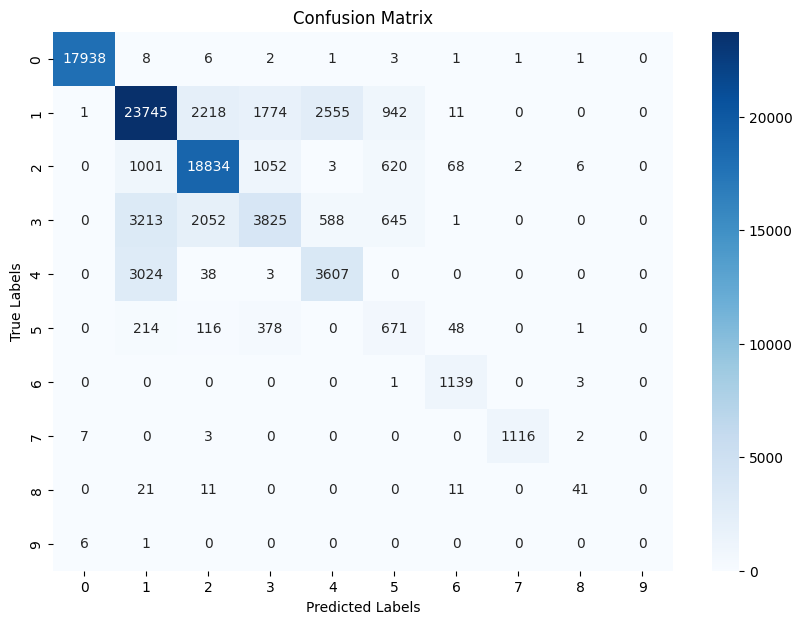

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9965    0.9977      3693
           1     0.7430    0.7477    0.7453      6255
           2     0.8062    0.8741    0.8388      4449
           3     0.5277    0.3502    0.4210      2179
           4     0.5125    0.5106    0.5115      1369
           5     0.2342    0.4698    0.3126       315
           6     0.8936    0.9960    0.9421       253
           7     0.9866    0.9866    0.9866       224
           8     0.8571    0.3000    0.4444        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7642     18758
   macro avg     0.6560    0.6232    0.6200     18758
weighted avg     0.7630    0.7642    0.7603     18758



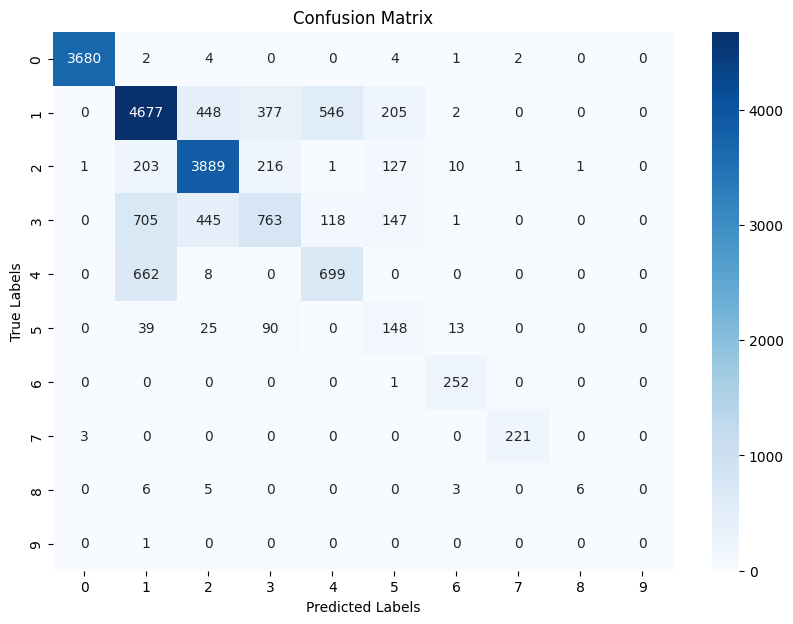

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9983    0.9978    0.9980      5373
           1     0.7560    0.7543    0.7551      9352
           2     0.8068    0.8686    0.8365      6599
           3     0.5285    0.3589    0.4275      3126
           4     0.5193    0.5233    0.5213      1953
           5     0.1819    0.4045    0.2510       403
           6     0.9136    0.9867    0.9487       375
           7     0.9973    0.9839    0.9905       372
           8     0.7368    0.5600    0.6364        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7687     27584
   macro avg     0.6438    0.6438    0.6365     27584
weighted avg     0.7696    0.7687    0.7664     27584



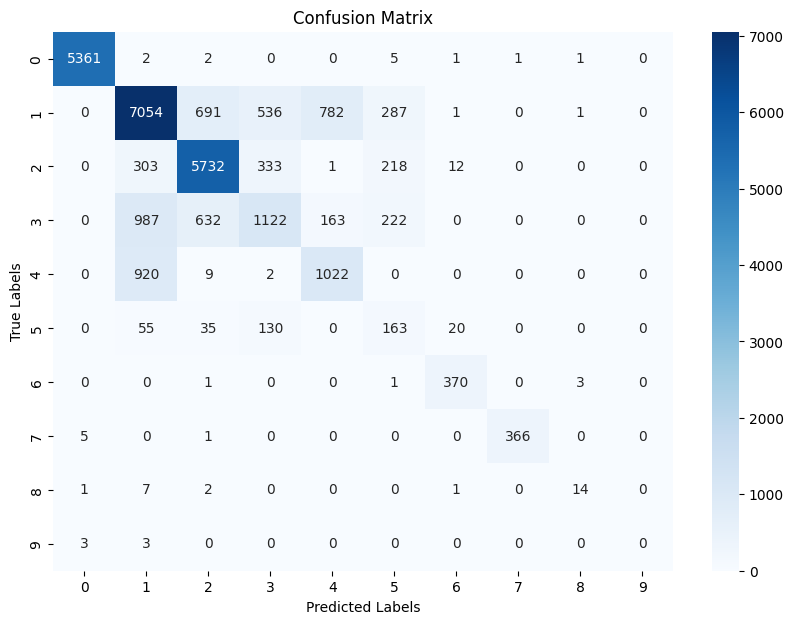

Start Round 25 ...
client_0: Loss = 0.4347, Accuracy = 0.7967
client_1: Loss = 0.4329, Accuracy = 0.7942
client_2: Loss = 0.42, Accuracy = 0.7996
client_3: Loss = 0.4363, Accuracy = 0.7952
client_4: Loss = 0.4412, Accuracy = 0.7927
After round 25, train_loss = 0.5049, train_acc = 0.7686, dev_loss = 0.5249, dev_acc = 0.7639, test_loss = 0.5123, test_acc = 0.7670
Training Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9991    0.9983    0.9987     17961
           1     0.7432    0.7870    0.7645     31246
           2     0.6967    0.9355    0.7987     21586
           3     0.5796    0.3877    0.4647     10324
           4     0.6120    0.2043    0.3063      6672
           5     0.6750    0.0945    0.1658      1428
           6     0.9460    0.9046    0.9249      1143
           7     1.0000    0.9867    0.9933      1128
           8     1.0000    0.2262    0.3689        84
           9     0.0000    0.0000    0.0000         7

 

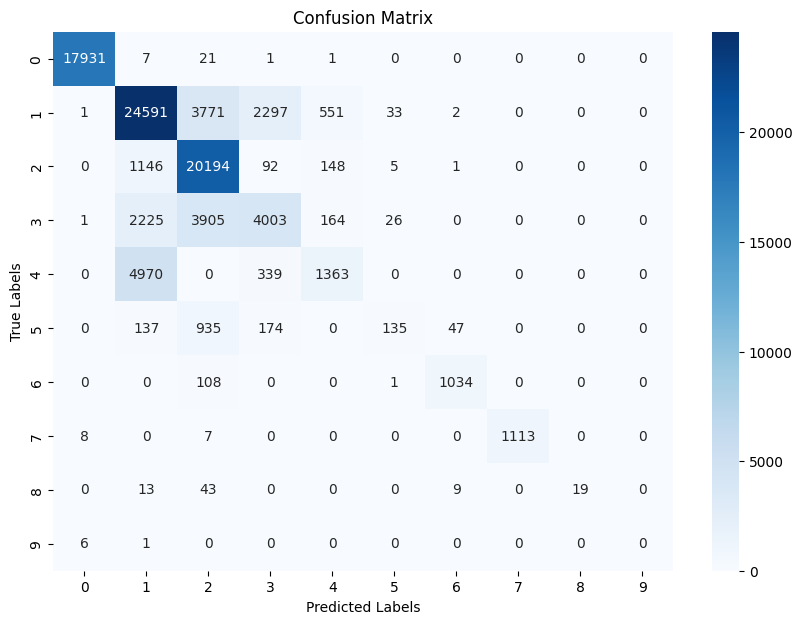

Development Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9965    0.9977      3693
           1     0.7304    0.7901    0.7591      6255
           2     0.7002    0.9321    0.7997      4449
           3     0.5770    0.3782    0.4569      2179
           4     0.5816    0.1848    0.2805      1369
           5     0.5882    0.0952    0.1639       315
           6     0.9355    0.9170    0.9261       253
           7     0.9910    0.9866    0.9888       224
           8     0.0000    0.0000    0.0000        20
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.7639     18758
   macro avg     0.6103    0.5280    0.5373     18758
weighted avg     0.7501    0.7639    0.7398     18758



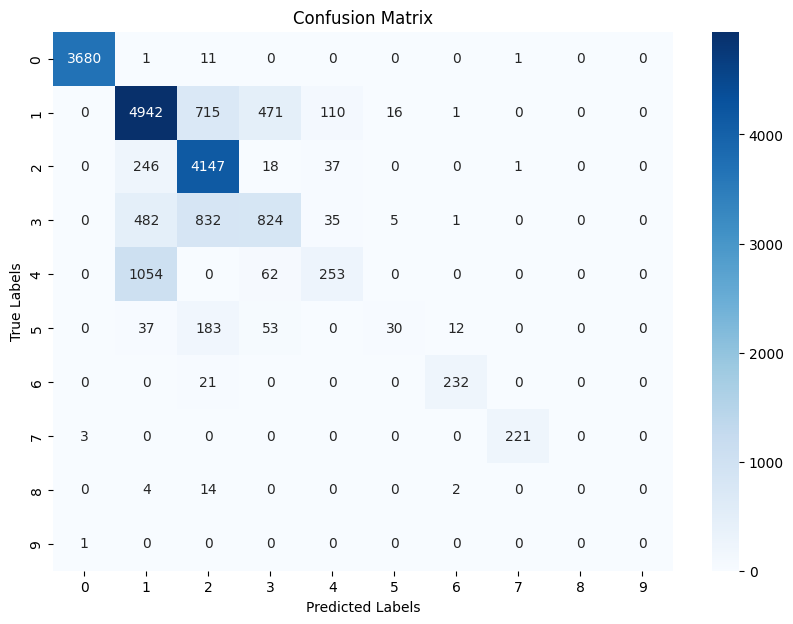

Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9980    0.9980    0.9980      5373
           1     0.7376    0.7807    0.7585      9352
           2     0.7031    0.9329    0.8019      6599
           3     0.5915    0.4002    0.4774      3126
           4     0.5462    0.1818    0.2728      1953
           5     0.4915    0.0720    0.1255       403
           6     0.9413    0.8987    0.9195       375
           7     0.9973    0.9785    0.9878       372
           8     0.9091    0.4000    0.5556        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7673     27584
   macro avg     0.6916    0.5643    0.5897     27584
weighted avg     0.7526    0.7673    0.7450     27584



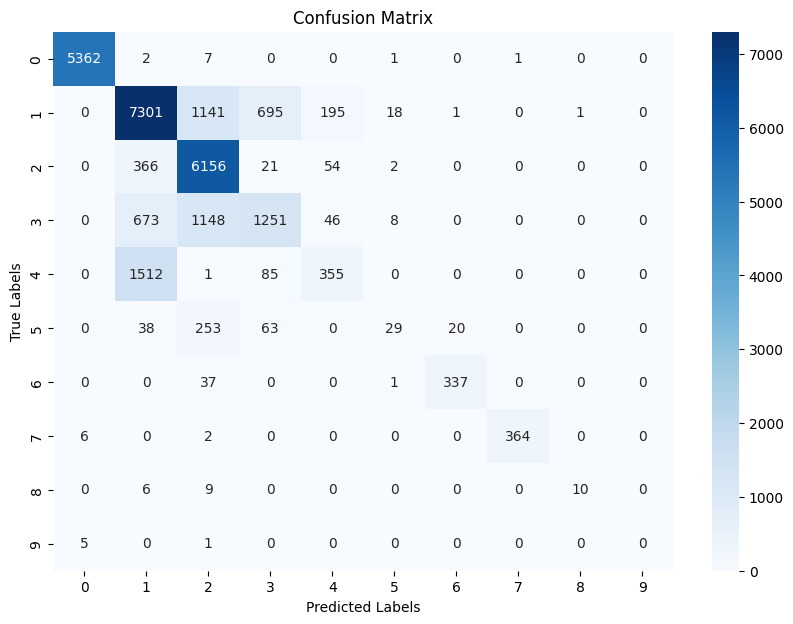

In [49]:
global_net = to_device(FederatedNetDNN(), device)
history = []
for i in range(rounds):
    print('Start Round {} ...'.format(i + 1))
    curr_parameters = global_net.get_parameters()
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    for client in clients:
        client_parameters = client.train(curr_parameters)
        fraction = client.get_dataset_size() / total_train_size
        for layer_name in client_parameters:
            new_parameters[layer_name]['weight'] += fraction * client_parameters[layer_name]['weight']
            new_parameters[layer_name]['bias'] += fraction * client_parameters[layer_name]['bias']
    global_net.apply_parameters(new_parameters)
    
    # Evaluate on training, development, and testing datasets
    train_loss, train_acc, train_labels, train_preds = global_net.evaluate(train_dataset)
    dev_loss, dev_acc, dev_labels, dev_preds = global_net.evaluate(dev_dataset)
    test_loss, test_acc, test_labels, test_preds = global_net.evaluate(test_dataset)
    
    # Print results
    print('After round {}, train_loss = {:.4f}, train_acc = {:.4f}, dev_loss = {:.4f}, dev_acc = {:.4f}, test_loss = {:.4f}, test_acc = {:.4f}'.format(
        i + 1, train_loss, train_acc, dev_loss, dev_acc, test_loss, test_acc
    ))
    
    # Append results to history
    history.append({
        'round': i + 1,
        'train_loss': train_loss,
        'train_acc': train_acc,
        'dev_loss': dev_loss,
        'dev_acc': dev_acc,
        'test_loss': test_loss,
        'test_acc': test_acc
    })
    
    # Print classification reports and confusion matrices
    print("Training Data:")
    print_classification_report_and_confusion_matrix(train_labels, train_preds, num_classes=10)

    print("Development Data:")
    print_classification_report_and_confusion_matrix(dev_labels, dev_preds, num_classes=10)
    
    print("Test Data:")
    print_classification_report_and_confusion_matrix(test_labels, test_preds, num_classes=10)

Final Model on Test Data:
Test Loss: 0.5123
Test Accuracy: 0.7670
Test Data:
Classification Report:
               precision    recall  f1-score   support

           0     0.9980    0.9980    0.9980      5373
           1     0.7376    0.7807    0.7585      9352
           2     0.7031    0.9329    0.8019      6599
           3     0.5915    0.4002    0.4774      3126
           4     0.5462    0.1818    0.2728      1953
           5     0.4915    0.0720    0.1255       403
           6     0.9413    0.8987    0.9195       375
           7     0.9973    0.9785    0.9878       372
           8     0.9091    0.4000    0.5556        25
           9     0.0000    0.0000    0.0000         6

    accuracy                         0.7673     27584
   macro avg     0.6916    0.5643    0.5897     27584
weighted avg     0.7526    0.7673    0.7450     27584



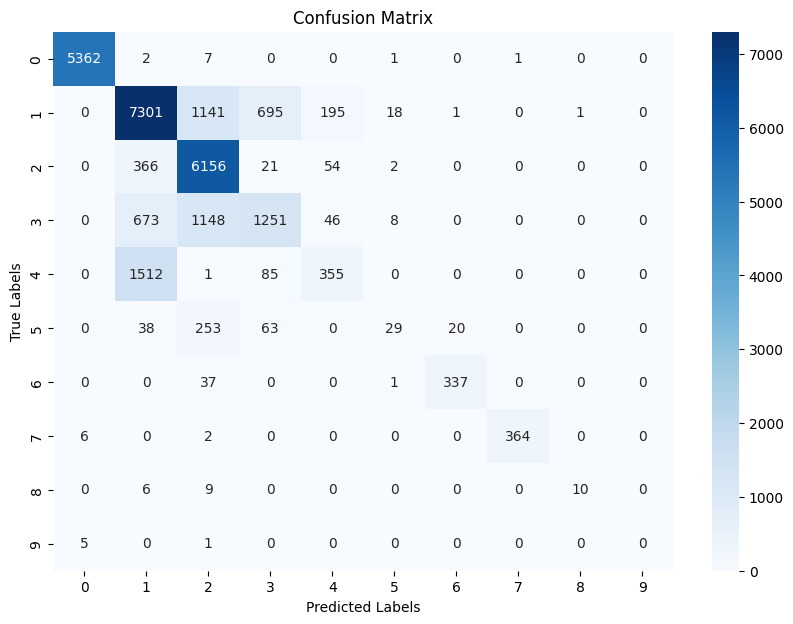

In [50]:
# Evaluate the final model on the test dataset
test_loss, test_acc, test_labels, test_preds = global_net.evaluate(test_dataset)

# Print the final accuracy
print('Final Model on Test Data:')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Print the classification report and confusion matrix
print("Test Data:")
print_classification_report_and_confusion_matrix(test_labels, test_preds, num_classes)

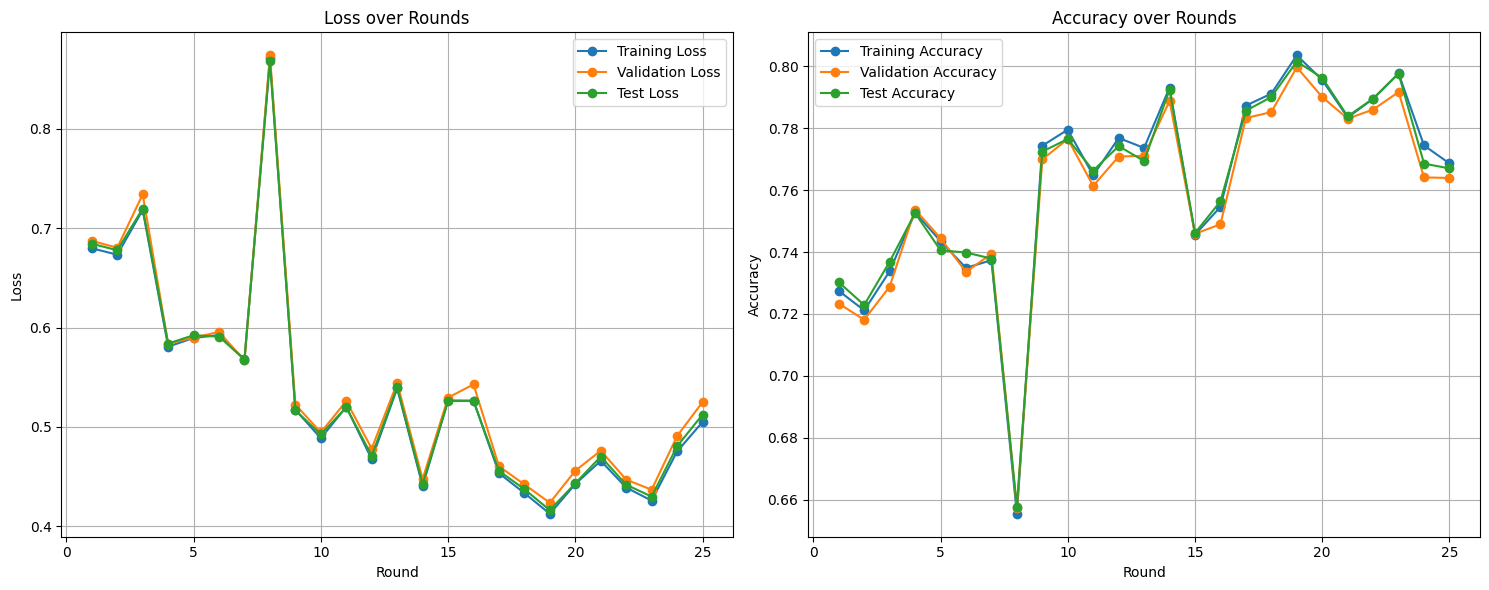

In [51]:
# After the federated learning rounds
def plot_history(history):
    rounds = [entry['round'] for entry in history]
    train_losses = [entry['train_loss'] for entry in history]
    train_accs = [entry['train_acc'] for entry in history]
    dev_losses = [entry['dev_loss'] for entry in history]
    dev_accs = [entry['dev_acc'] for entry in history]
    test_losses = [entry['test_loss'] for entry in history]
    test_accs = [entry['test_acc'] for entry in history]
    
    plt.figure(figsize=(15, 6))
    
    # Plot Losses
    plt.subplot(1, 2, 1)
    plt.plot(rounds, train_losses, marker='o', label='Training Loss')
    plt.plot(rounds, dev_losses, marker='o', label='Validation Loss')
    plt.plot(rounds, test_losses, marker='o', label='Test Loss')
    plt.xlabel('Round')
    plt.ylabel('Loss')
    plt.title('Loss over Rounds')
    plt.legend()
    plt.grid(True)

    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(rounds, train_accs, marker='o', label='Training Accuracy')
    plt.plot(rounds, dev_accs, marker='o', label='Validation Accuracy')
    plt.plot(rounds, test_accs, marker='o', label='Test Accuracy')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Rounds')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

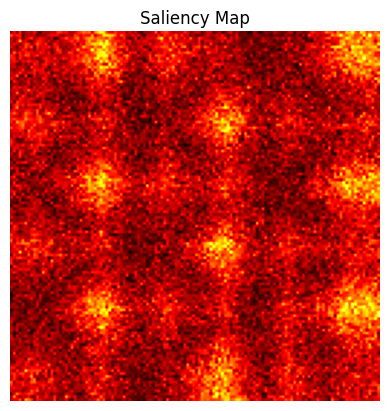

In [52]:
def compute_saliency_map(model, image, label):
    model.eval()
    image = image.unsqueeze(0).to(device)  # Add batch dimension
    image.requires_grad_()
    label = torch.tensor([label]).to(device)
    
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    
    saliency, _ = torch.max(image.grad.data.abs(), dim=1)
    return saliency[0].cpu().numpy()

# Example usage with a sample image and label
sample_image, sample_label = train_dataset[0]
saliency_map = compute_saliency_map(global_net, sample_image, sample_label)

plt.imshow(saliency_map, cmap='hot')
plt.axis('off')
plt.title('Saliency Map')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

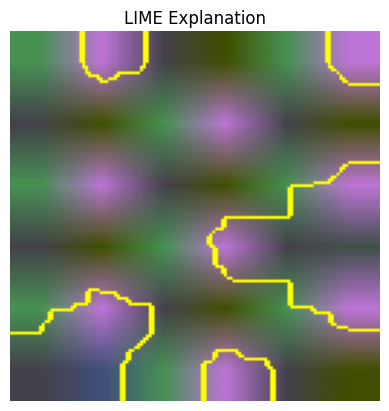

In [53]:
def lime_explanation(model, image, label):
    def predict_fn(images):
        images = torch.stack([transforms.ToTensor()(img) for img in images]).to(device)
        with torch.no_grad():
            outputs = model(images)
        return F.softmax(outputs, dim=1).cpu().numpy()

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image.numpy().transpose(1, 2, 0), predict_fn, top_labels=10, hide_color=0, num_samples=1000)
    
    temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp, mask))
    plt.axis('off')
    plt.title('LIME Explanation')
    plt.show()

# Example usage with a sample image and label
sample_image, sample_label = train_dataset[0]
lime_explanation(global_net, sample_image, sample_label)

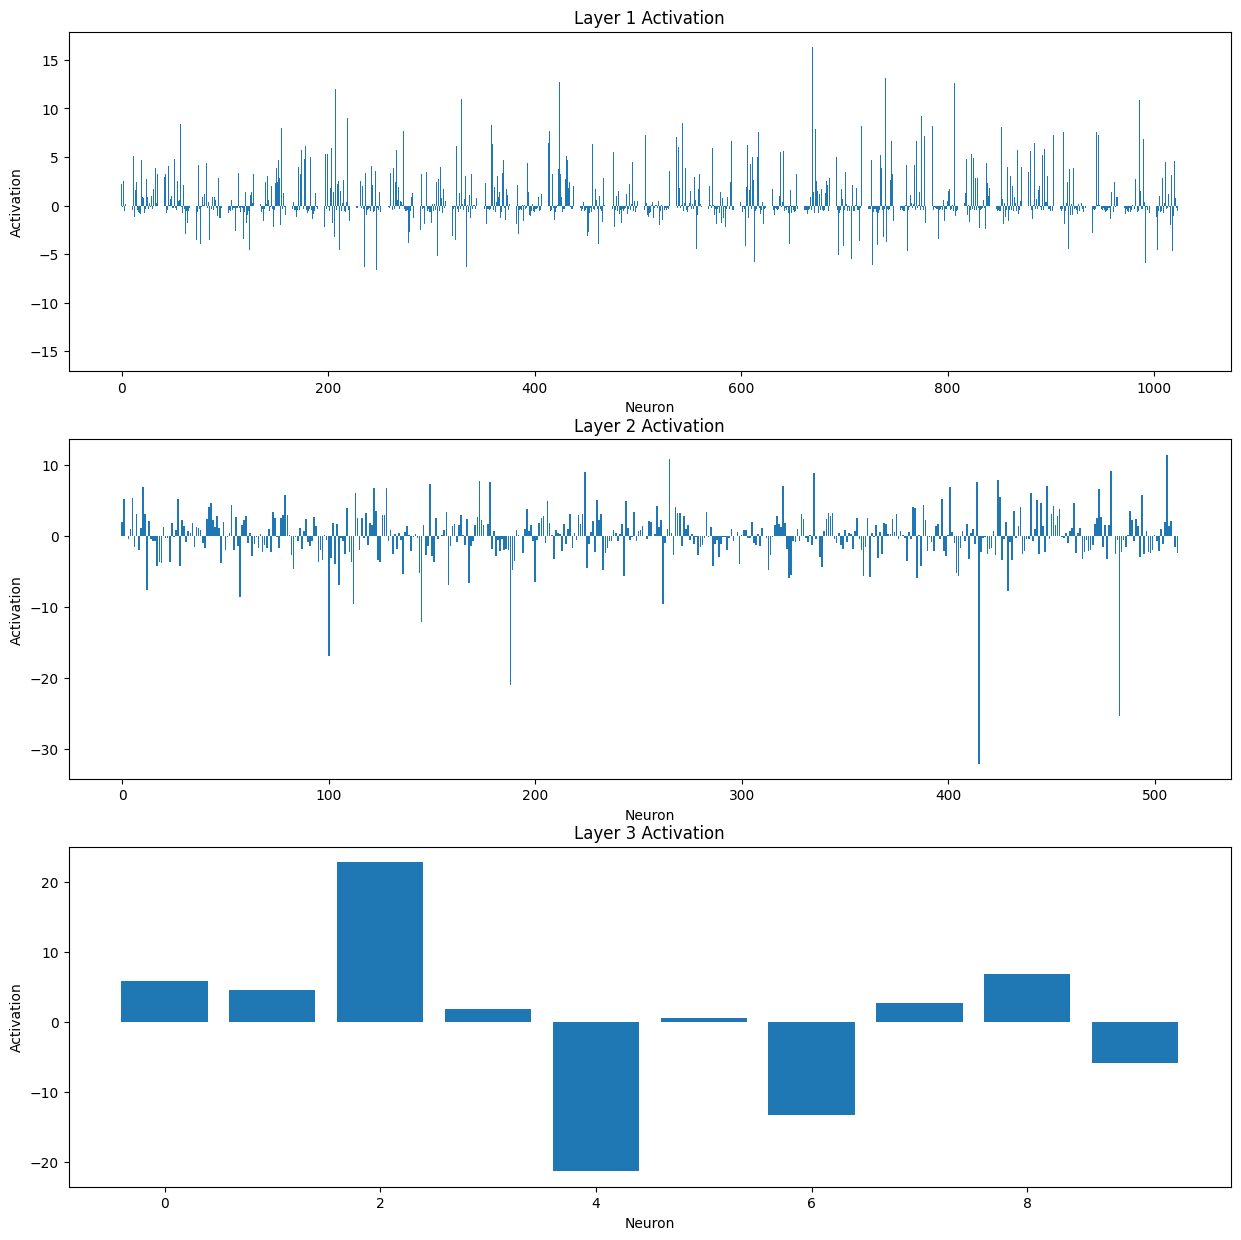

In [59]:
def visualize_activations(model, image):
    model.eval()
    with torch.no_grad():
        x = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
        activations = []
        hooks = []
        
        def hook_fn(module, input, output):
            activations.append(output.cpu())
        
        # Register hooks for fully connected layers
        for layer_name in ['fc1', 'fc2', 'fc3']:
            if layer_name in model.get_track_layers():
                hooks.append(model.get_track_layers()[layer_name].register_forward_hook(hook_fn))
        
        _ = model(x)  # Forward pass to activate hooks
        
        # Remove hooks
        for hook in hooks:
            hook.remove()
        
        # Plot activations
        num_layers = len(activations)
        fig, axes = plt.subplots(num_layers, 1, figsize=(15, 5 * num_layers))
        if num_layers == 1:
            axes = [axes]  # Ensure axes is iterable if there's only one layer
        for i, activation in enumerate(activations):
            activation = activation.squeeze(0)  # Remove batch dimension
            if activation.dim() == 1:
                # If activation is 1D, just plot it as a bar plot
                num_features = activation.size(0)
                ax = axes[i]
                ax.bar(range(num_features), activation.numpy())
                ax.set_title(f'Layer {i+1} Activation')
                ax.set_xlabel('Neuron')
                ax.set_ylabel('Activation')
            elif activation.dim() == 2:
                # If activation is 2D, plot the average activation over the batch
                num_features = activation.size(1)
                avg_activation = activation.mean(dim=0).numpy()
                ax = axes[i]
                ax.bar(range(num_features), avg_activation)
                ax.set_title(f'Layer {i+1} Activation')
                ax.set_xlabel('Neuron')
                ax.set_ylabel('Average Activation')
            else:
                # If activation has unexpected dimensions, just print the shape
                print(f'Unexpected activation shape: {activation.shape}')
                ax = axes[i]
                ax.text(0.5, 0.5, f'Unexpected shape: {activation.shape}', ha='center', va='center')
                ax.axis('off')
        plt.show()

# Example usage with a sample image
sample_image, _ = train_dataset[0]
visualize_activations(global_net, sample_image)